# 428_ra236.530_dec-46.922_4U1543

In [156]:
from pathlib import Path
import numpy as np
import arviz as az
import graphviz as gv
import utility_functions as ufn
import importlib

importlib.reload(ufn)
az.style.use("arviz-white")

RANDOM_SEED = 2023-10-10
rng = np.random.default_rng(RANDOM_SEED)

OVERWRITE_TRACES = False

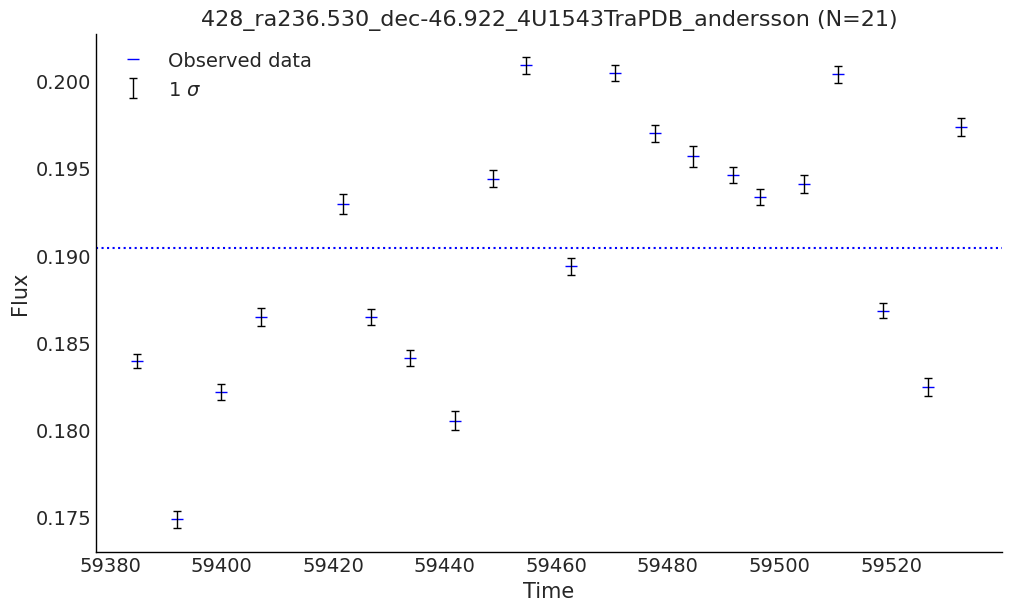

In [157]:
# File paths to CSVs of flux density observations.
csv_paths_list = sorted(list(Path('data_raw').iterdir()))
csv_path = csv_paths_list[1]
ufn.plot_lc(csv_path)

## SE Kernel only, Zero Mean Function

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta \exp\left\{ - \frac{1}{2\ell^2}\tau^2\right\}$$

$$\ell \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

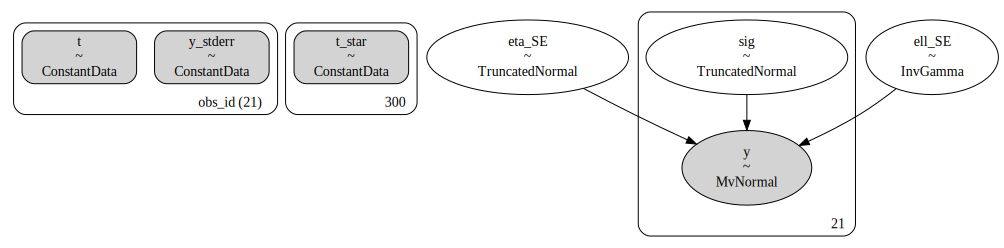

In [158]:
se0_trace_path = Path(f"traces/{csv_path.stem}_se0_idata.nc")
se0_dag_path = Path(f'dags/{csv_path.stem}_se0_dag.dot')

if se0_trace_path.is_file() and not OVERWRITE_TRACES:
    se0_trace = az.from_netcdf(se0_trace_path)
    se0_dag = gv.Source.from_file(se0_dag_path)
else:
    se0_trace, se0_dag = ufn.fit_se_gp(csv_path)
    az.to_netcdf(se0_trace, se0_trace_path)
    with open(se0_dag_path, 'w') as writehandle:
        writehandle.write(se0_dag.source)

gv.Source(se0_dag.source)

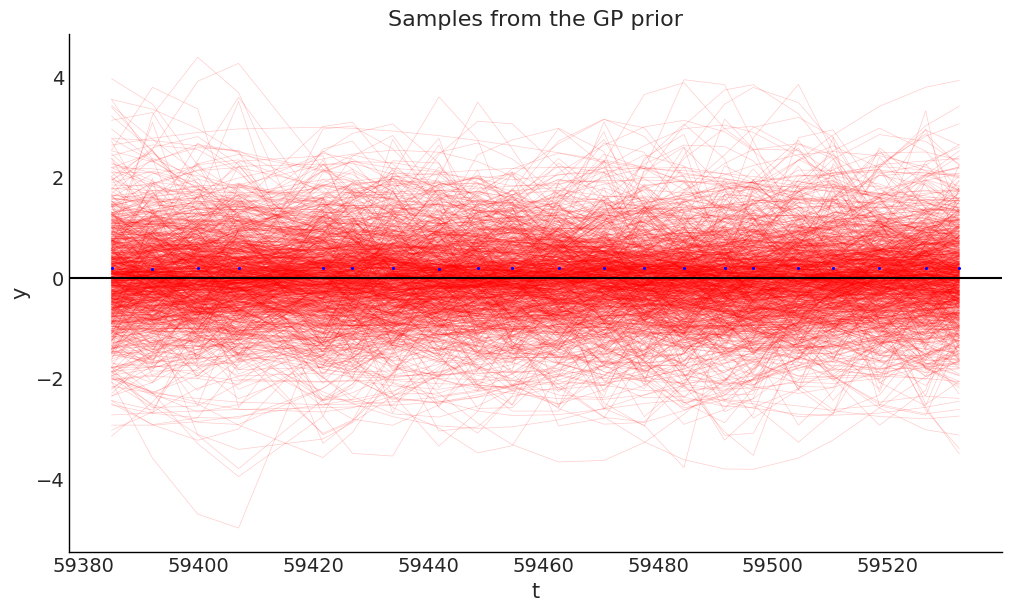

In [159]:
ufn.plot_priorpred_samples(se0_trace, variable_name="y")

In [160]:
variable_names = ["ell_SE", "eta_SE"]
ufn.print_post_summary(se0_trace, variable_names)

median       mad    eti_16%    eti_84%  mcse_median   ess_median  \
ell_SE  12.411078  0.438513  11.727518  13.044707     0.009536  5705.129452   
eta_SE   0.022255  0.006234   0.014927   0.035125     0.000140  5642.492064   

           ess_tail     r_hat       mean        sd  
ell_SE  3409.016643  1.001822  12.387786  0.663866  
eta_SE  3248.421125  1.000354   0.025451  0.012932

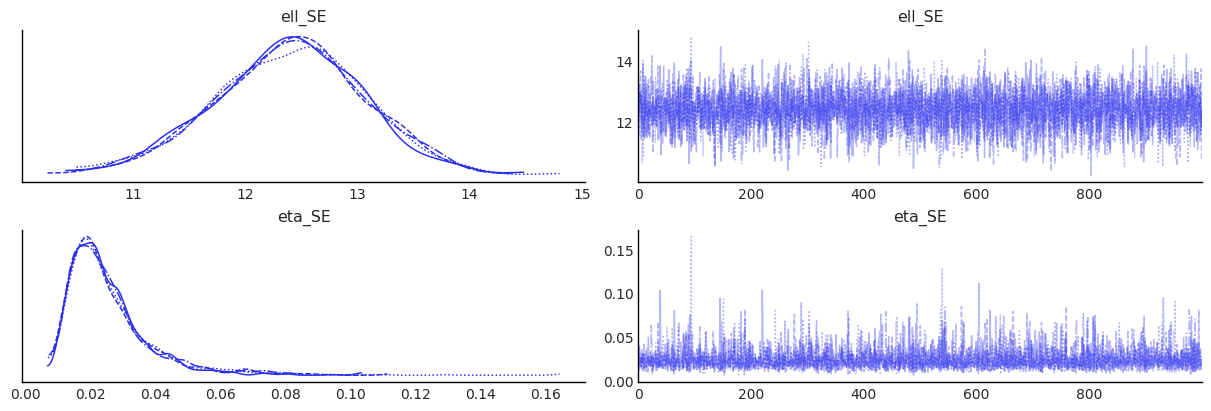

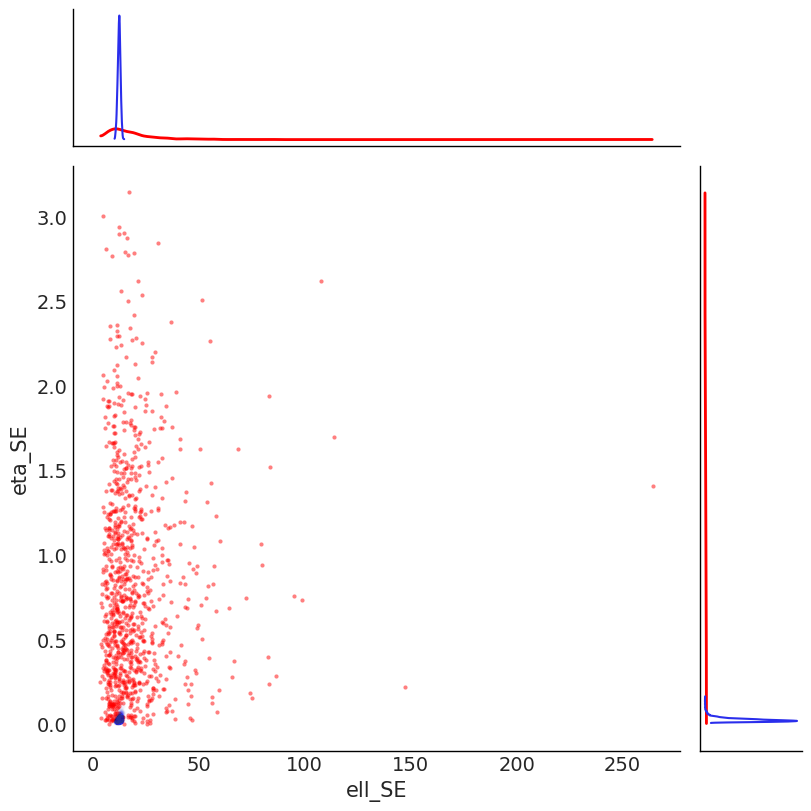

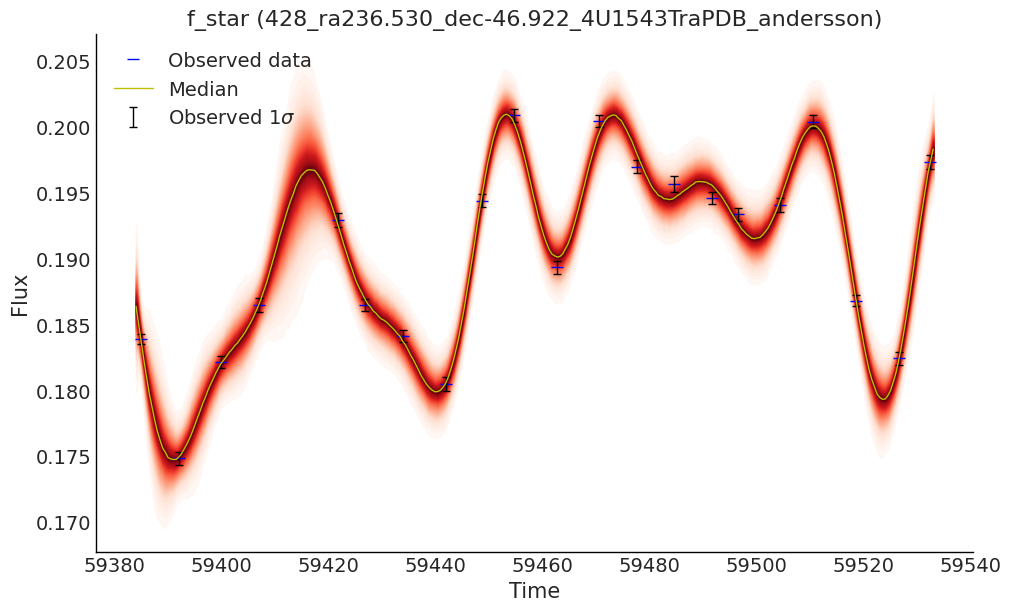

In [161]:
ufn.plot_traces(se0_trace, variable_names)
ufn.plot_priorpost_cnr(se0_trace, variable_names)
ufn.plot_postpred_samples(se0_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


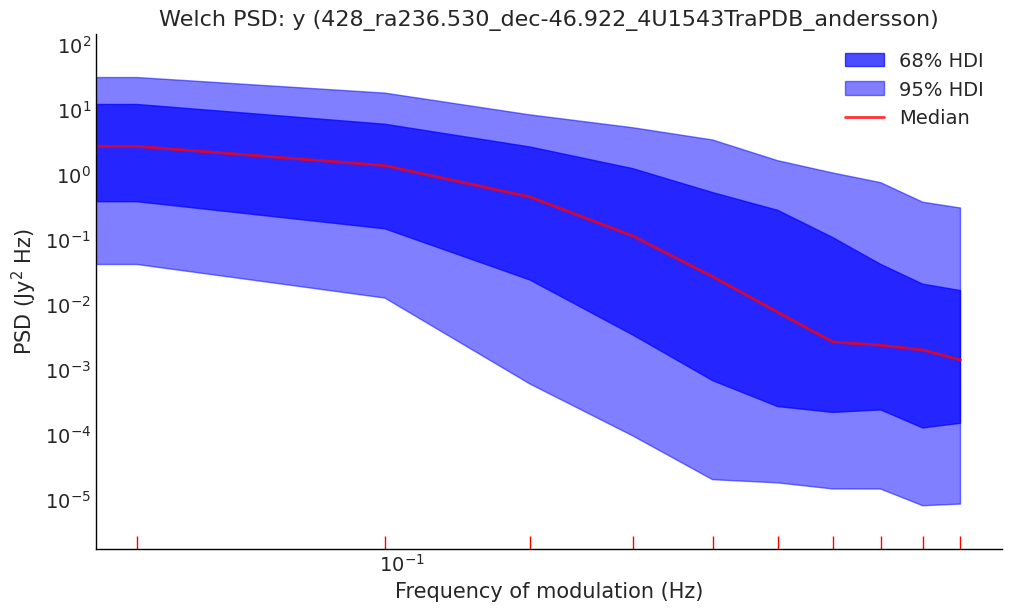

In [162]:
ufn.plot_welch_psd(se0_trace, group="prior_predictive", variable_name="y")

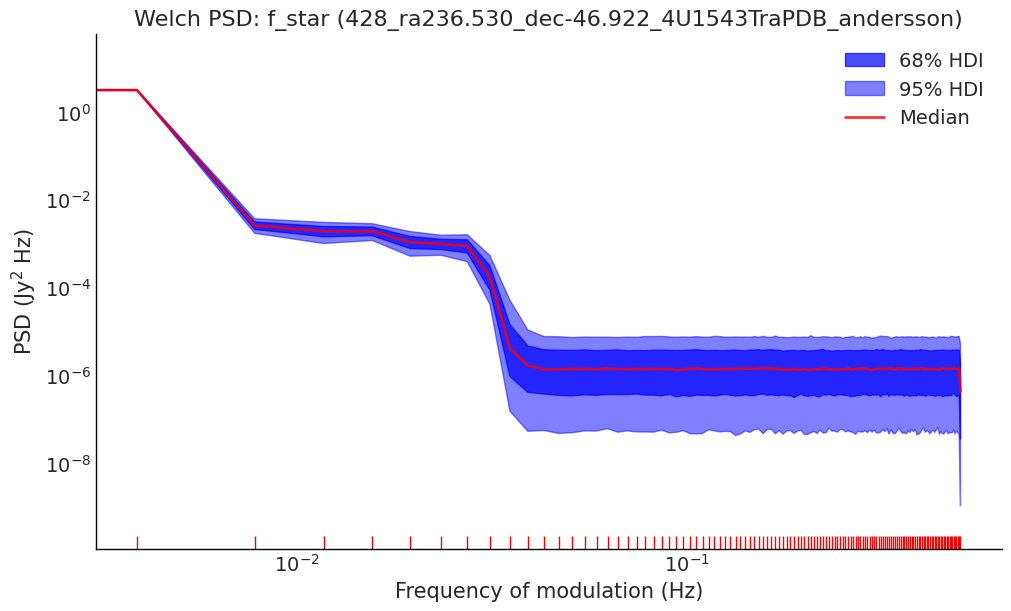

In [163]:
ufn.plot_welch_psd(se0_trace, group="posterior_predictive", variable_name="f_star");

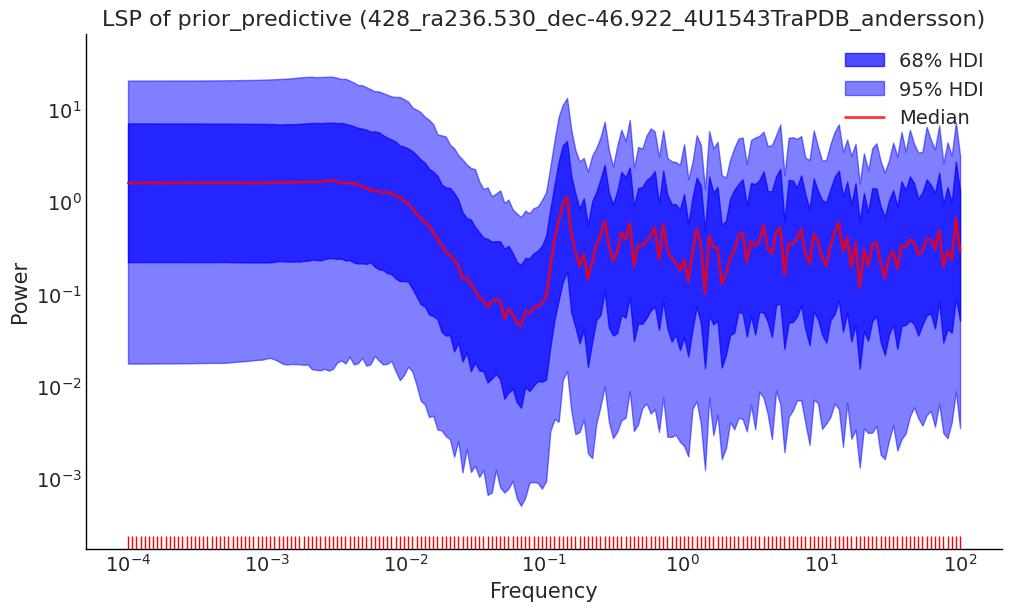

In [164]:
ufn.plot_lsp(se0_trace, group="prior_predictive", variable_name="y")

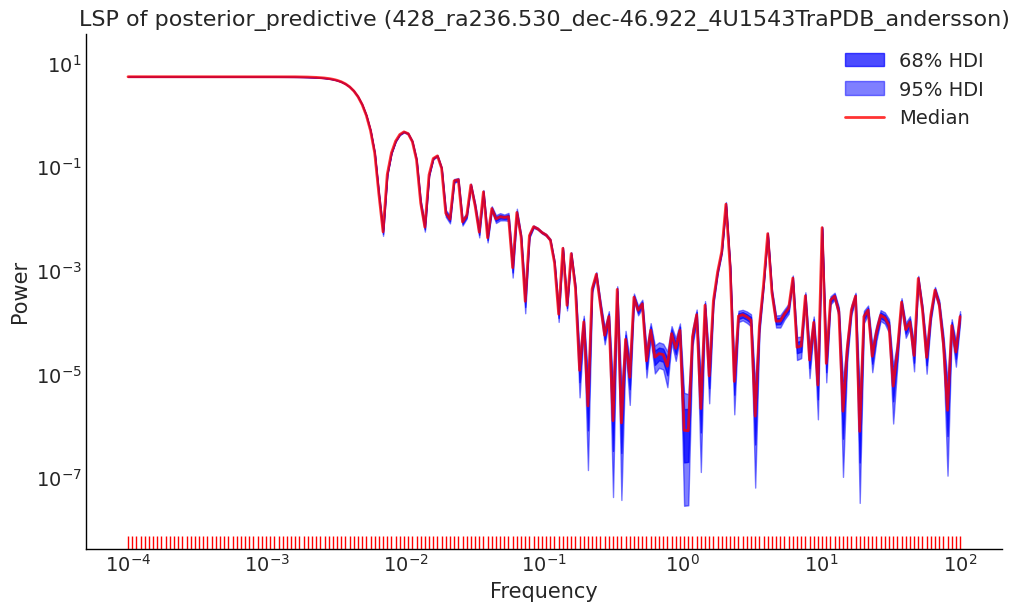

In [165]:
ufn.plot_lsp(se0_trace, "posterior_predictive", "f_star")

## Matern $\frac{3}{2}$ Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{M}(\tau) =  \eta_\textrm{M}^2\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

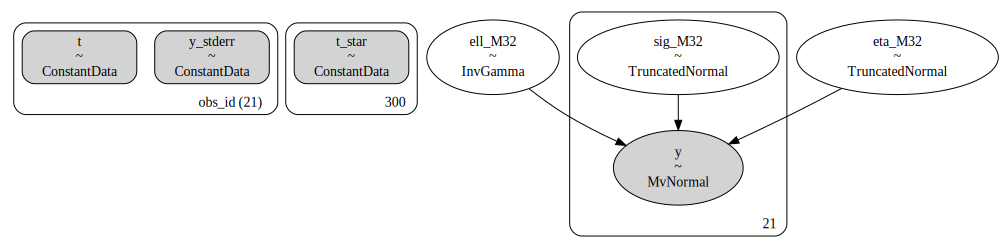

In [166]:
m32_trace_path = Path(f"traces/{csv_path.stem}_m32_idata.nc")
m32_dag_path = Path(f'dags/{csv_path.stem}_m32_dag.dot')

if m32_trace_path.is_file() and not OVERWRITE_TRACES:
    m32_trace = az.from_netcdf(m32_trace_path)
    m32_dag = gv.Source.from_file(m32_dag_path)
else:
    m32_trace, m32_dag = ufn.fit_m32_gp(csv_path, rng_seed=rng);
    az.to_netcdf(m32_trace, m32_trace_path)
    with open(m32_dag_path, 'w') as writehandle:
        writehandle.write(m32_dag.source)

gv.Source(m32_dag.source)

In [167]:
variable_names = ["ell_M32", "eta_M32"]
ufn.print_post_summary(m32_trace, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
ell_M32  106.864606  27.162784  76.160383  167.672539     0.960878   
eta_M32    0.048105   0.028789   0.019689    0.174544     0.001026   

          ess_median     ess_tail     r_hat        mean         sd  
ell_M32  3046.077809  2452.682042  1.004130  121.261692  52.658000  
eta_M32  3141.056933  2179.793760  1.003514    0.108323   0.177046

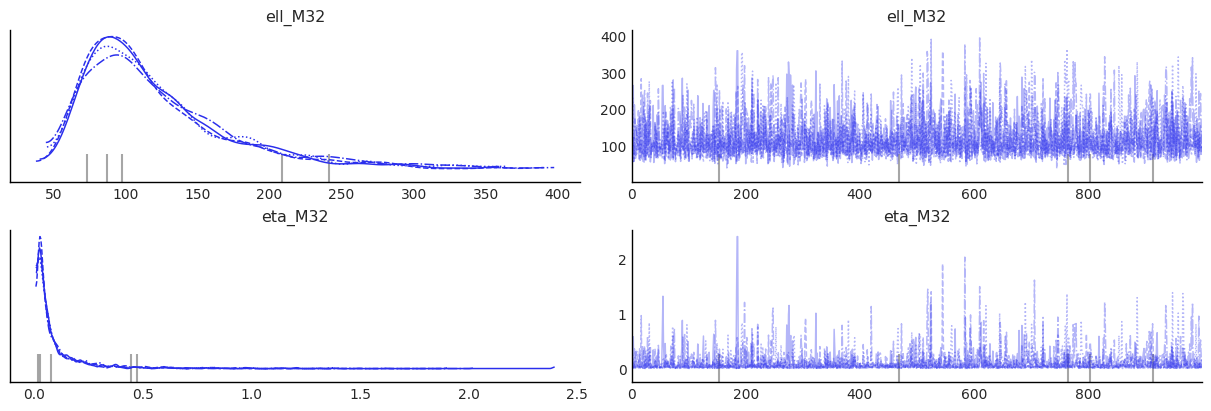

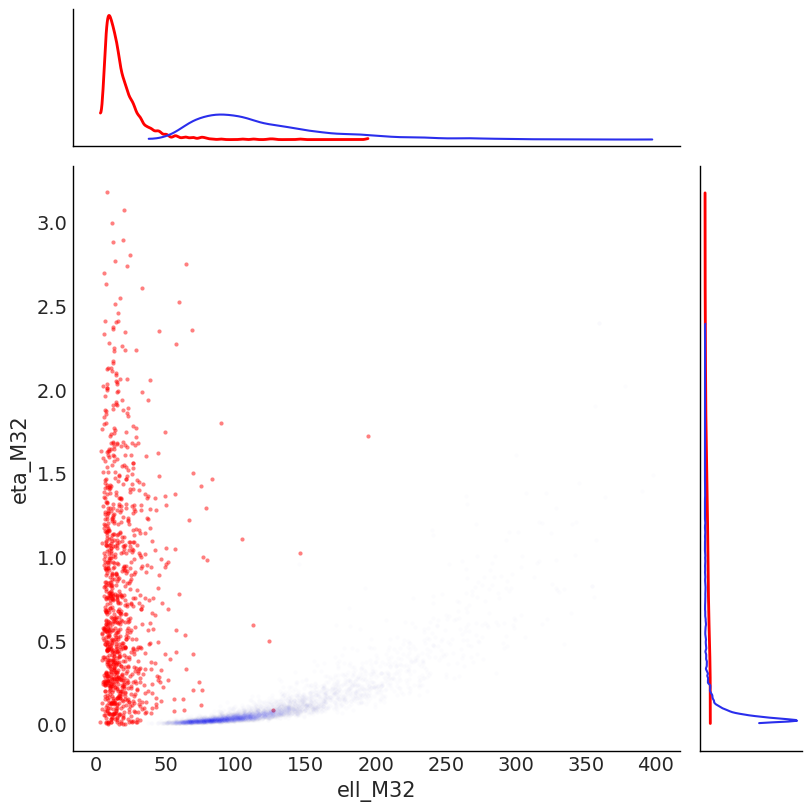

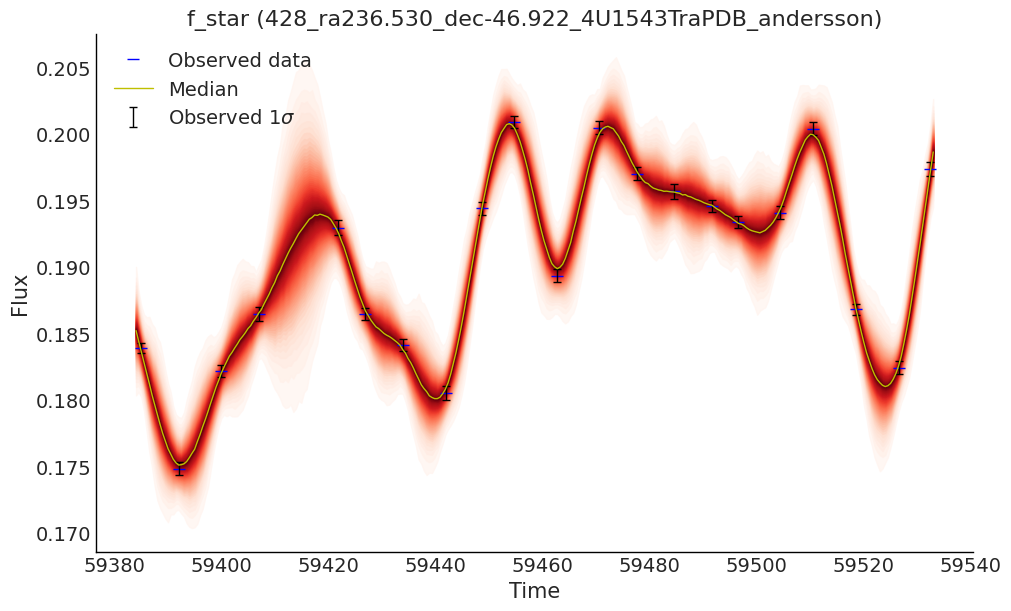

In [168]:
ufn.plot_traces(m32_trace, variable_names)
ufn.plot_priorpost_cnr(m32_trace, variable_names)
ufn.plot_postpred_samples(m32_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


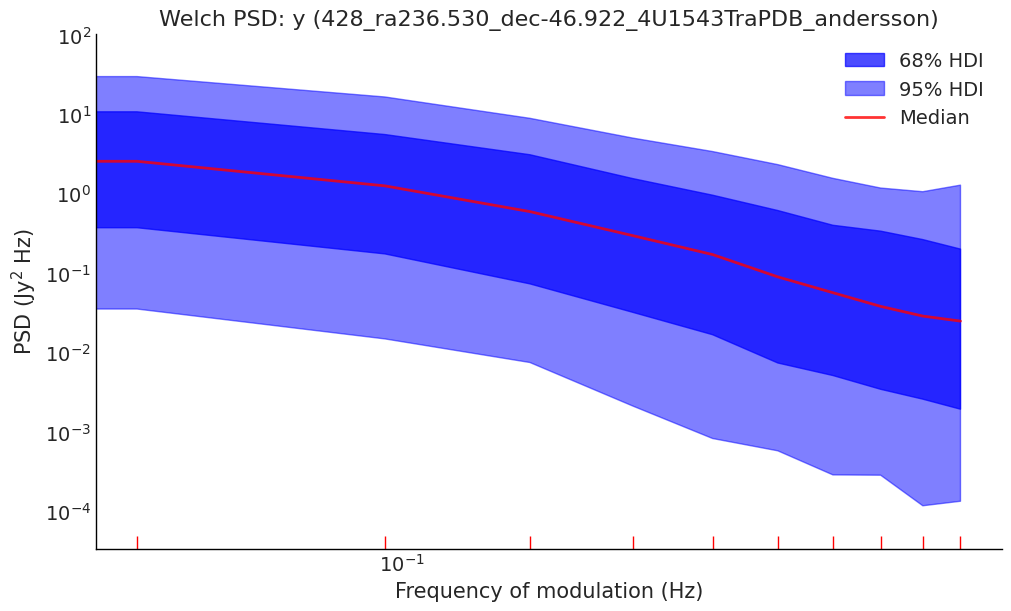

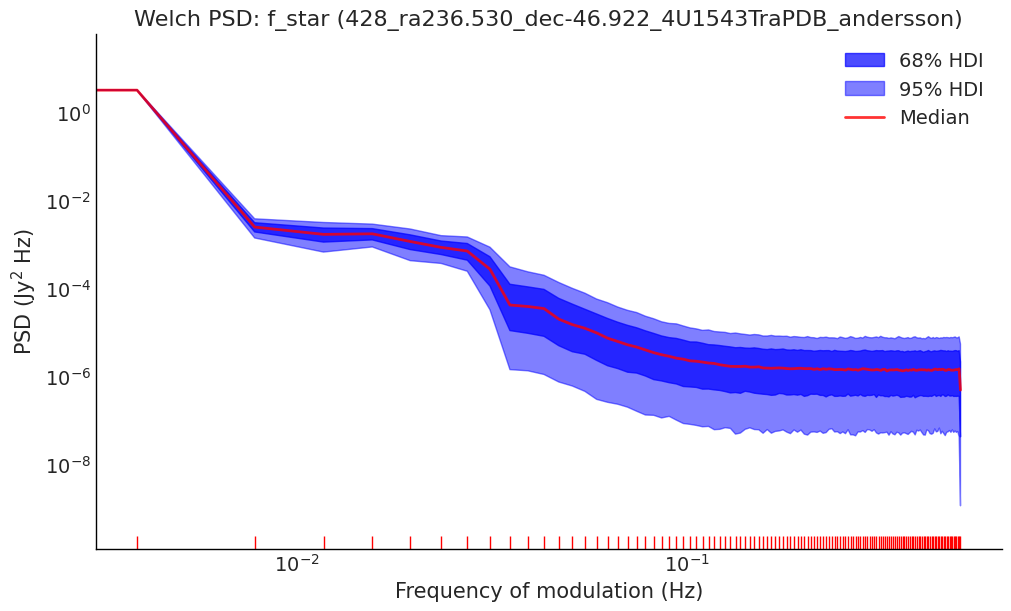

In [169]:
ufn.plot_welch_psd(m32_trace, "prior_predictive", "y")
ufn.plot_welch_psd(m32_trace);

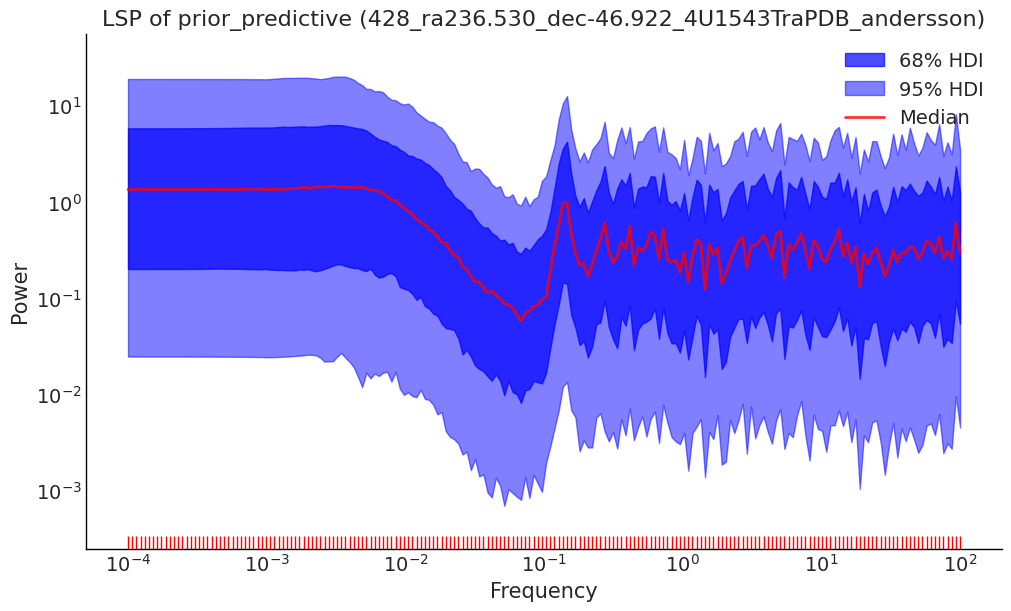

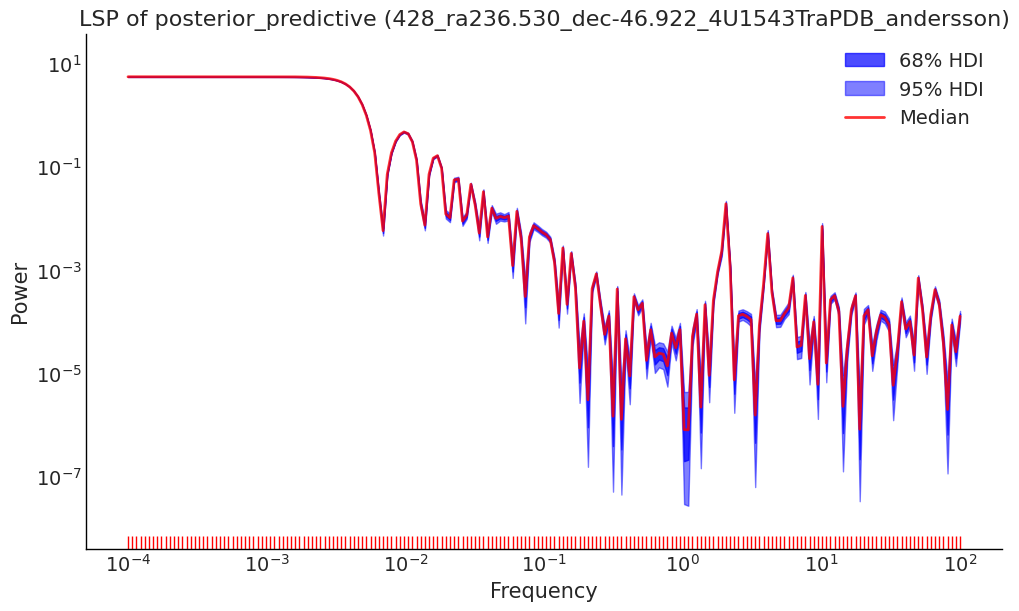

In [170]:
ufn.plot_lsp(m32_trace, "prior_predictive", "y")
ufn.plot_lsp(m32_trace)

## SE + Matern $\frac{3}{2}$ additive kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta \left[ \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} + \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\} \right]$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

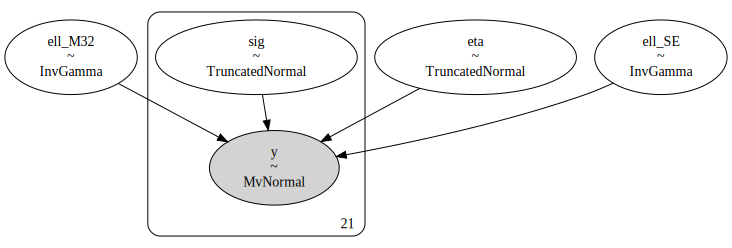

In [171]:
se_m32_trace_path = Path(f"traces/{csv_path.stem}_se+m32_idata.nc")
se_m32_dag_path = Path(f'dags/{csv_path.stem}_se+m32_dag.dot')

if se_m32_trace_path.is_file() and not OVERWRITE_TRACES:
    se_m32_trace = az.from_netcdf(se_m32_trace_path)
    se_m32_dag = gv.Source.from_file(se_m32_dag_path)
else:
    se_m32_trace, se_m32_dag = ufn.fit_se_m32_gp(csv_path, multiplicative_kernel=False, rng_seed=rng);
    az.to_netcdf(se_m32_trace, se_m32_trace_path)
    with open(se_m32_dag_path, 'w') as writehandle:
        writehandle.write(se_m32_dag.source)

gv.Source(se_m32_dag.source)

In [172]:
variable_names = ["ell_SE", "ell_M32", "eta"]
ufn.print_post_summary(se_m32_trace, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
ell_SE   67.034533  23.113611  41.162714  125.820741     0.774570   
ell_M32  69.071307  14.572941  51.785735   99.100559     0.588662   
eta       0.014581   0.007039   0.007297    0.038929     0.000281   

          ess_median     ess_tail     r_hat       mean         sd  
ell_SE   3021.362619  2133.185283  1.001504  87.728288  80.627107  
ell_M32  2834.444483  1750.971018  1.002988  76.017940  30.236084  
eta      3212.716081  1781.773315  1.001765   0.028684   0.060704

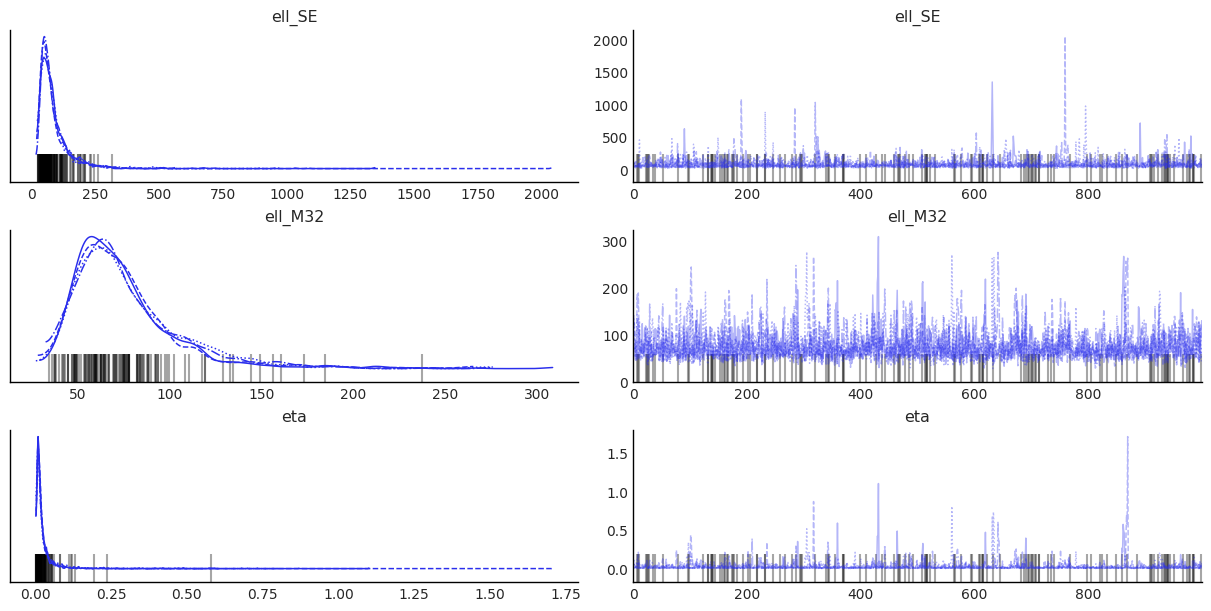

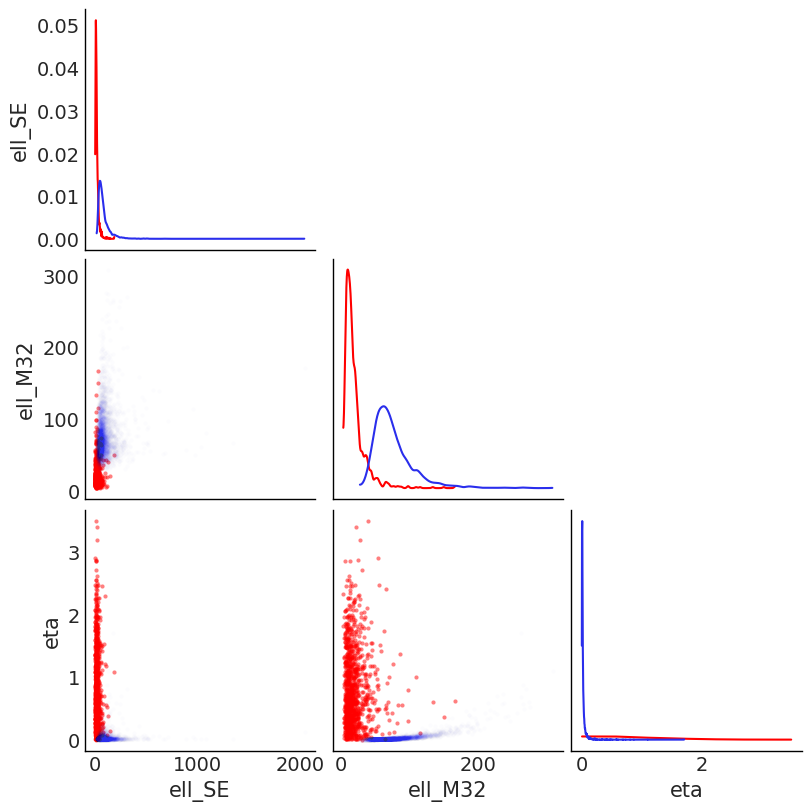

In [173]:
ufn.plot_traces(se_m32_trace, variable_names)
ufn.plot_priorpost_cnr(se_m32_trace, variable_names)

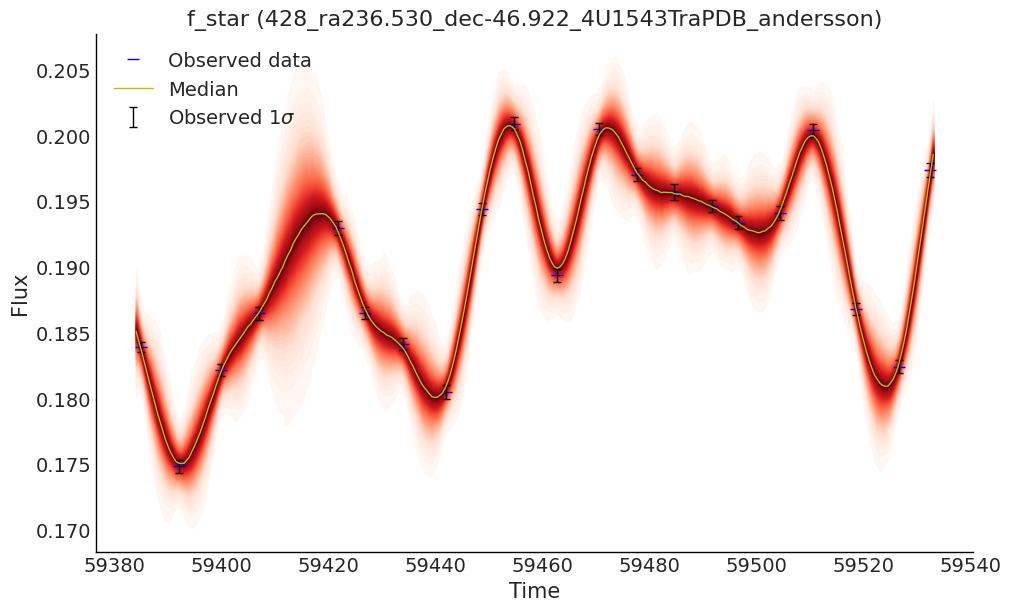

In [174]:
ufn.plot_postpred_samples(se_m32_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


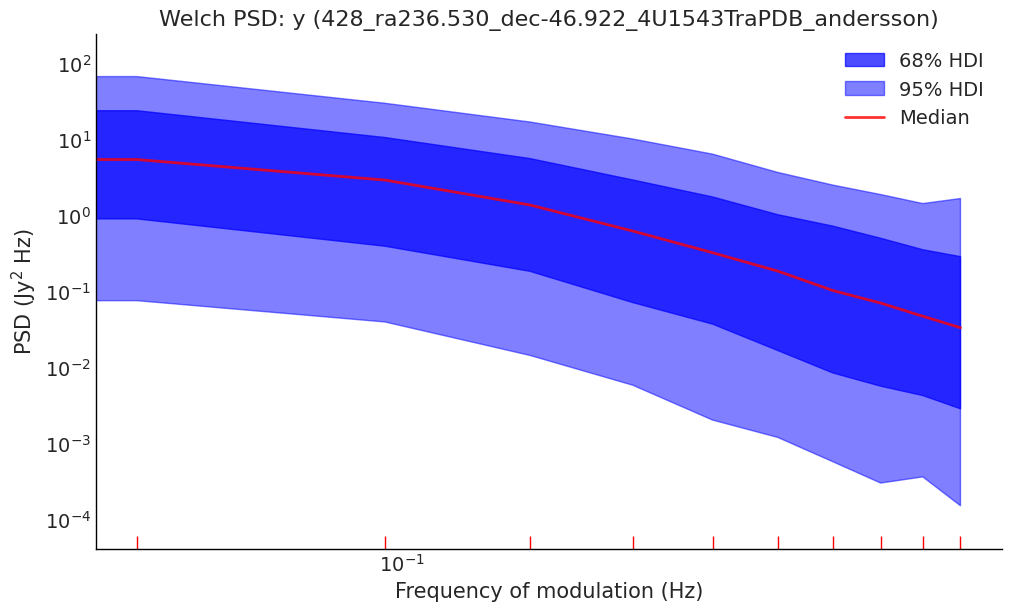

In [175]:
ufn.plot_welch_psd(se_m32_trace, "prior_predictive", "y")

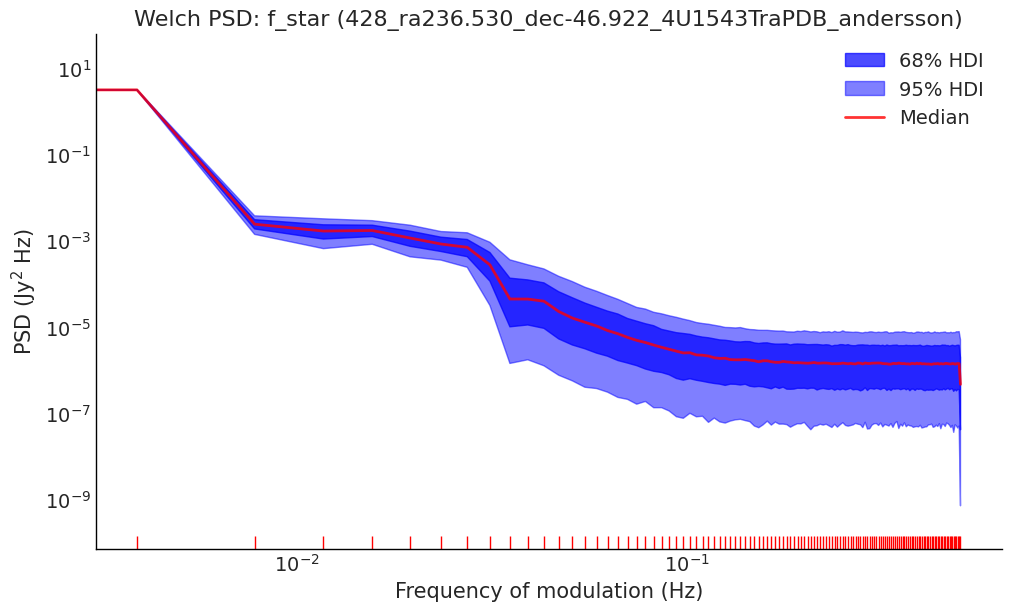

In [176]:
ufn.plot_welch_psd(se_m32_trace);

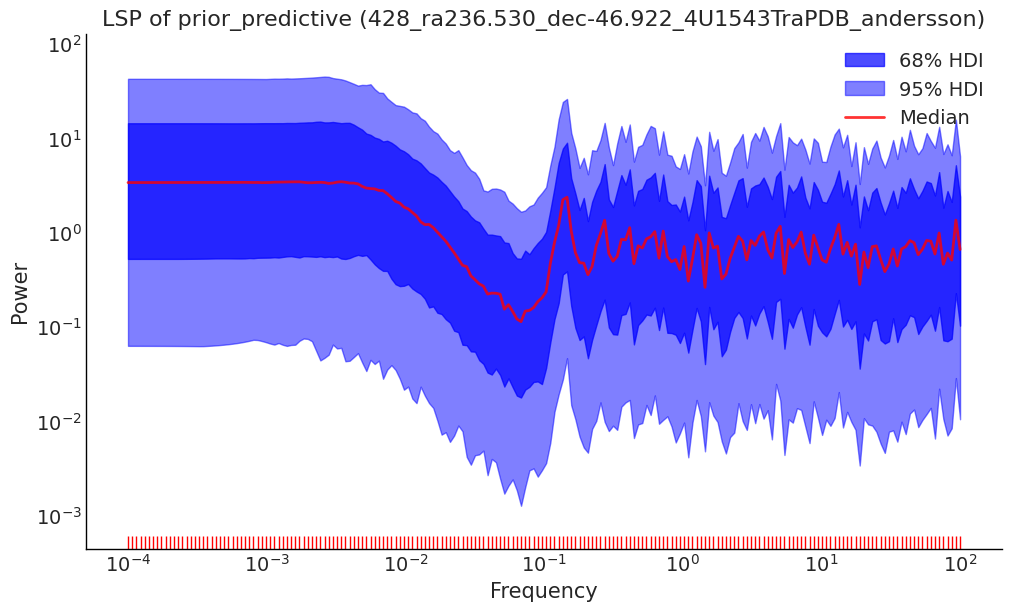

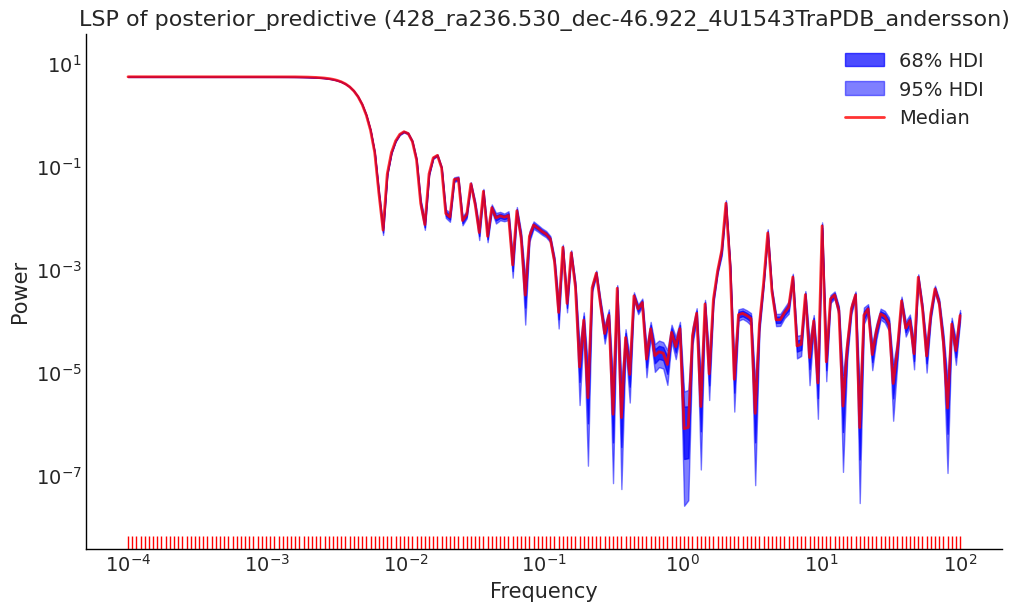

In [177]:
ufn.plot_lsp(se_m32_trace, "prior_predictive", "y")
ufn.plot_lsp(se_m32_trace, "posterior_predictive", "f_star")

## SE $\times$ Matern $\frac{3}{2}$ Multiplicative Kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta \times \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} \times \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

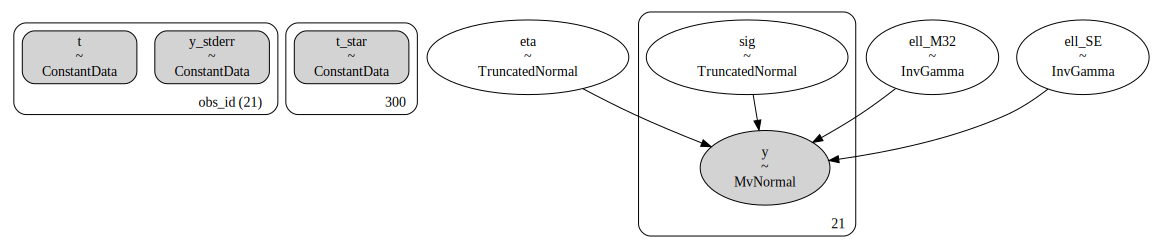

In [178]:
sexm32_trace_path = Path(f"traces/{csv_path.stem}_sexm32_idata.nc")
sexm32_dag_path = Path(f'dags/{csv_path.stem}_sexm32_dag.dot')

if sexm32_trace_path.is_file() and not OVERWRITE_TRACES:
    sexm32_trace = az.from_netcdf(sexm32_trace_path)
    sexm32_dag = gv.Source.from_file(sexm32_dag_path)
else:
    sexm32_trace, sexm32_dag = ufn.fit_se_m32_gp(csv_path, multiplicative_kernel=True, rng_seed=rng);
    az.to_netcdf(sexm32_trace, sexm32_trace_path)
    with open(sexm32_dag_path, 'w') as writehandle:
        writehandle.write(sexm32_dag.source)

gv.Source(sexm32_dag.source)

In [179]:
variable_names = ["ell_SE", "ell_M32", "eta"]
ufn.print_post_summary(sexm32_trace, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
ell_SE   85.459854  28.456457  53.716216  154.104221     0.701587   
ell_M32  94.916587  19.043115  71.463434  133.114044     0.587589   
eta       0.035972   0.017396   0.017570    0.088584     0.000562   

          ess_median     ess_tail     r_hat        mean         sd  
ell_SE   3995.303199  2426.883586  1.001124  108.817863  97.803743  
ell_M32  3545.576505  1911.600115  1.000513  103.320793  38.832524  
eta      3658.854340  1859.220797  1.001501    0.064724   0.108128

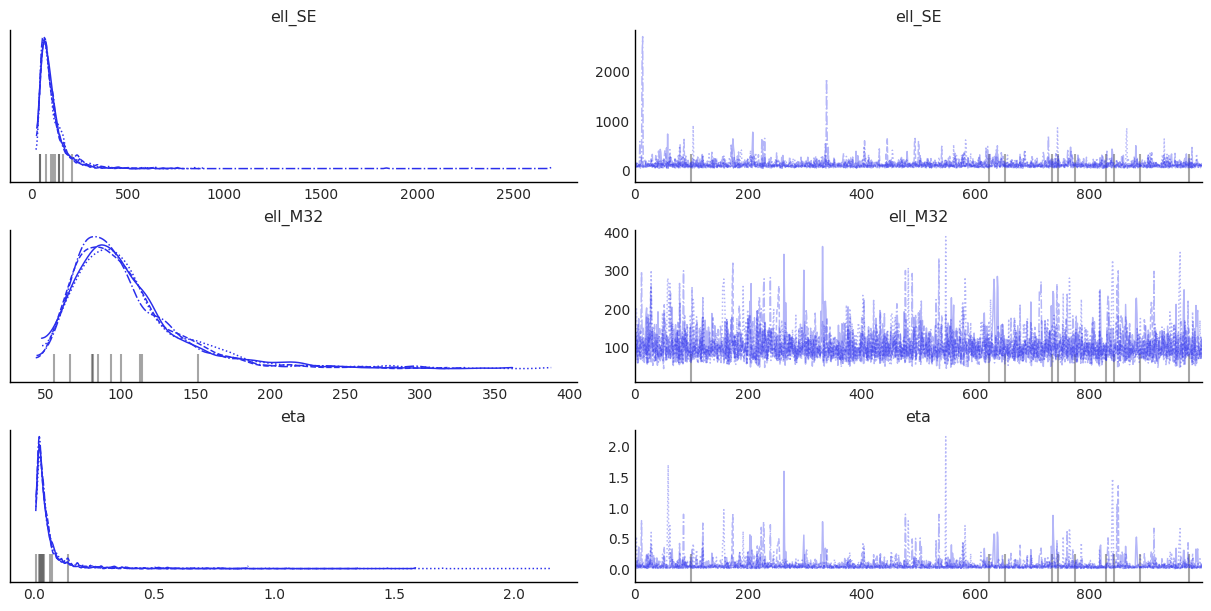

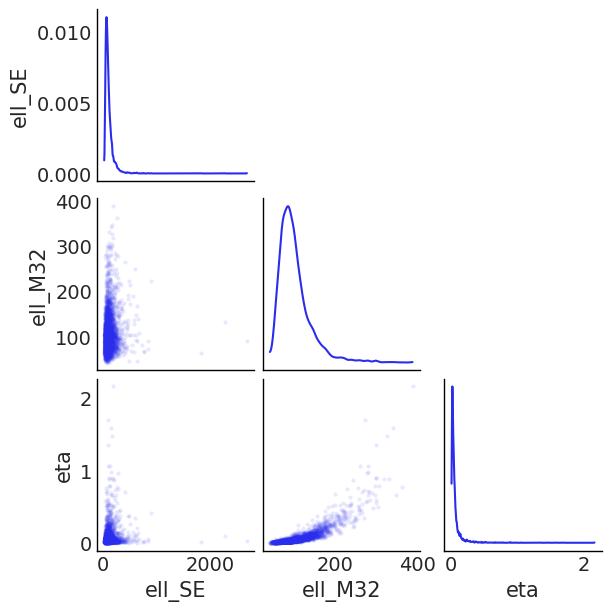

In [180]:
ufn.plot_traces(sexm32_trace, variable_names)
ufn.plot_post_cnr(sexm32_trace, variable_names)

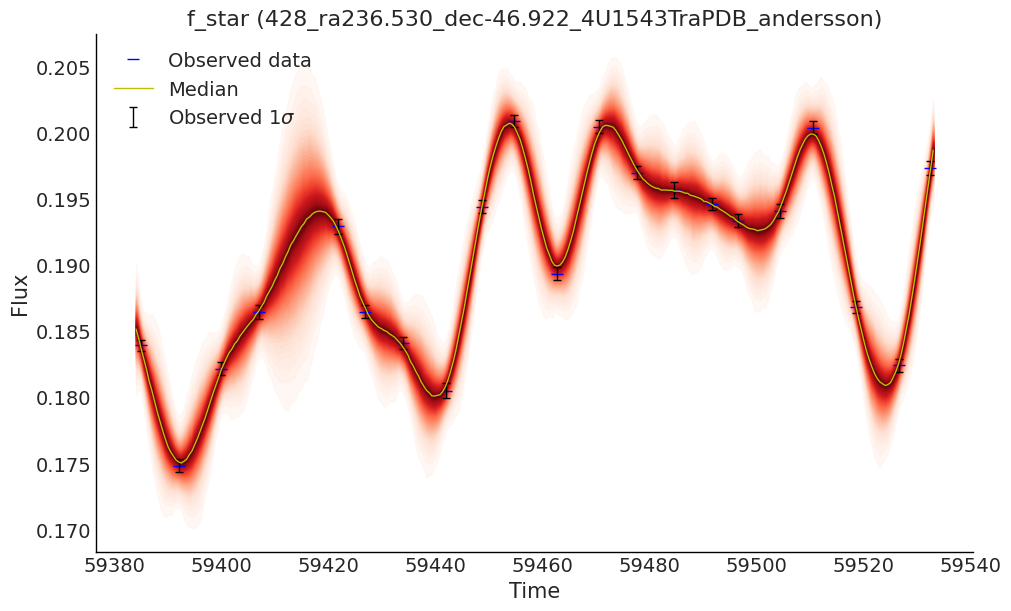

In [181]:
ufn.plot_postpred_samples(sexm32_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


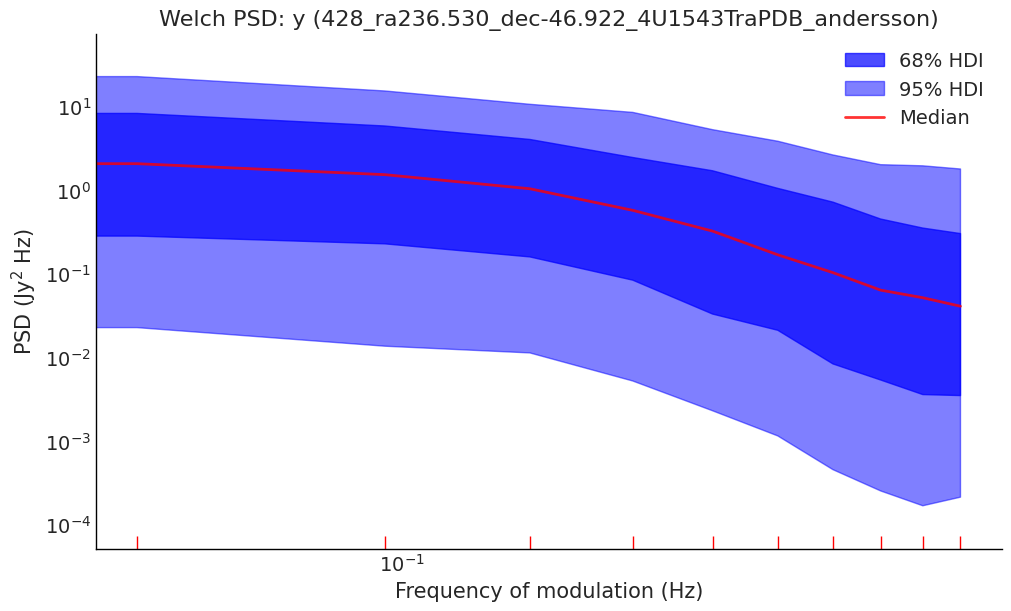

In [182]:
ufn.plot_welch_psd(sexm32_trace, "prior_predictive", "y")

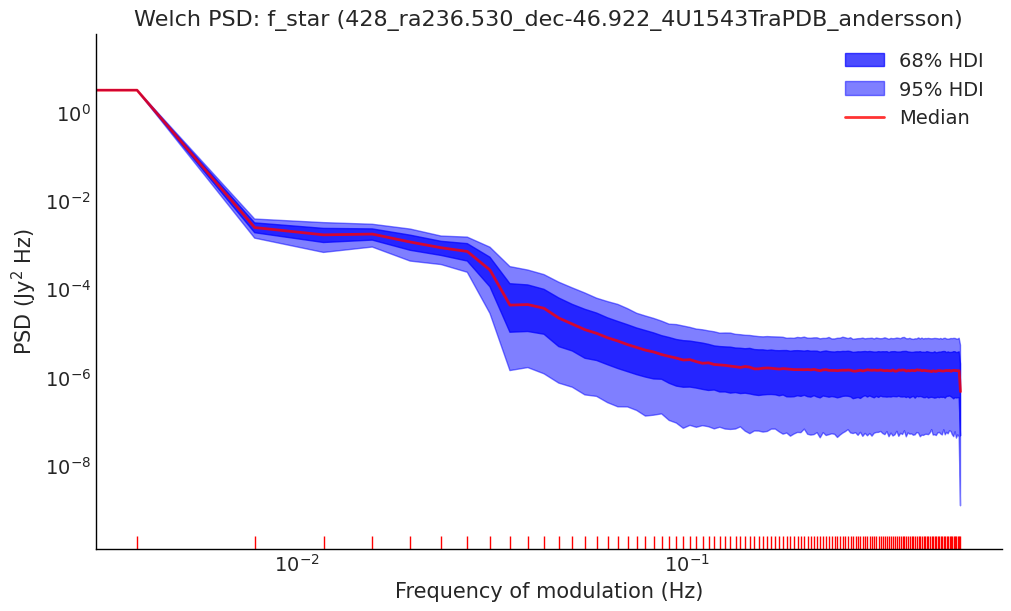

In [183]:
ufn.plot_welch_psd(sexm32_trace);

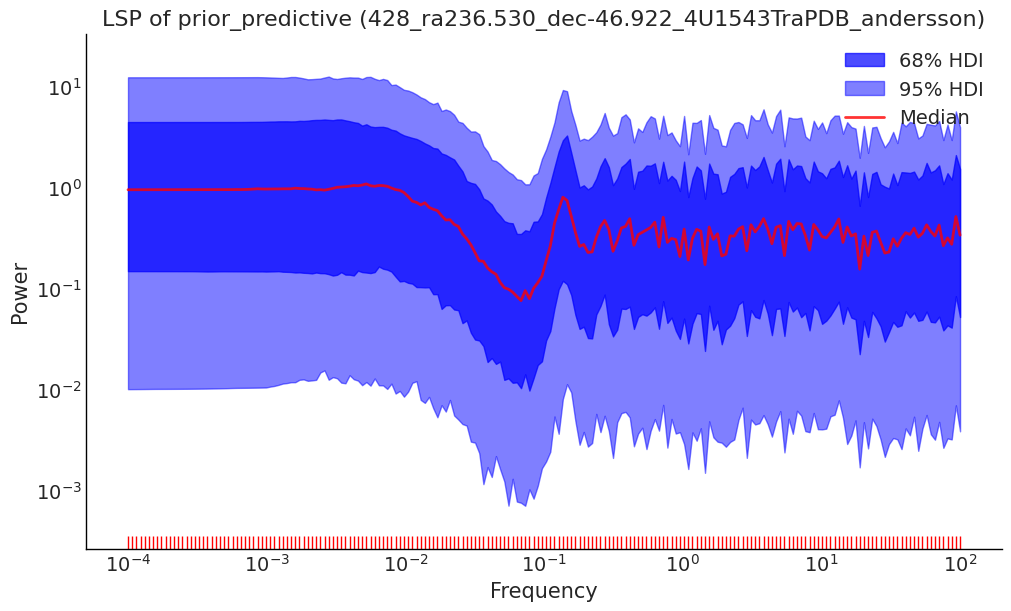

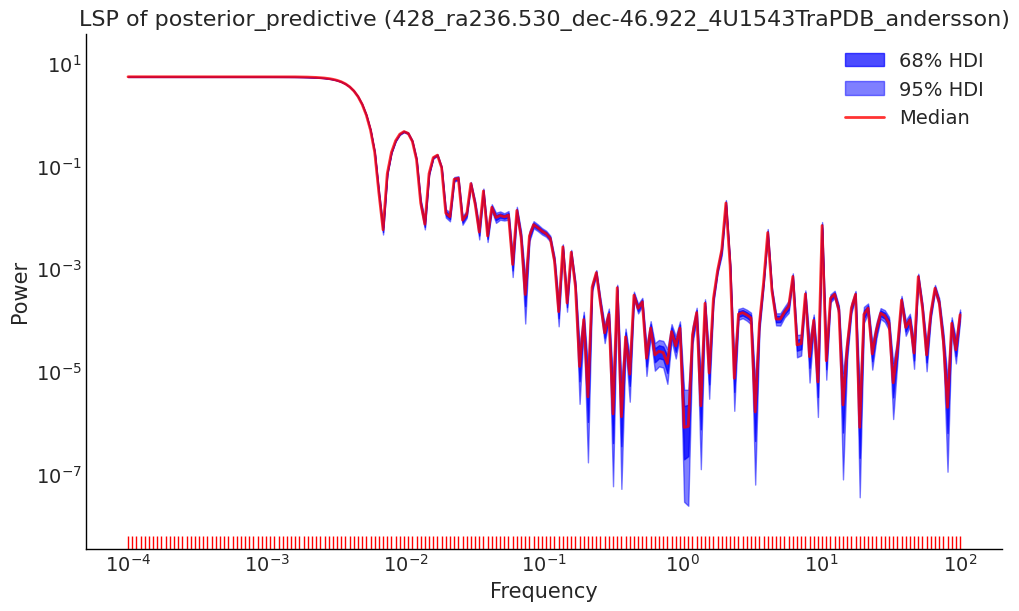

In [184]:
ufn.plot_lsp(sexm32_trace, "prior_predictive", "y")
ufn.plot_lsp(sexm32_trace, "posterior_predictive", "f_star")

## SE GP + Matern $\frac{3}{2}$ GP

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}, \quad k_\textrm{M}(\tau) = \eta_\textrm{M}\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta_\textrm{SE} \sim \mathcal{N}^+(0, 1)$$

$$\eta_\textrm{M} \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

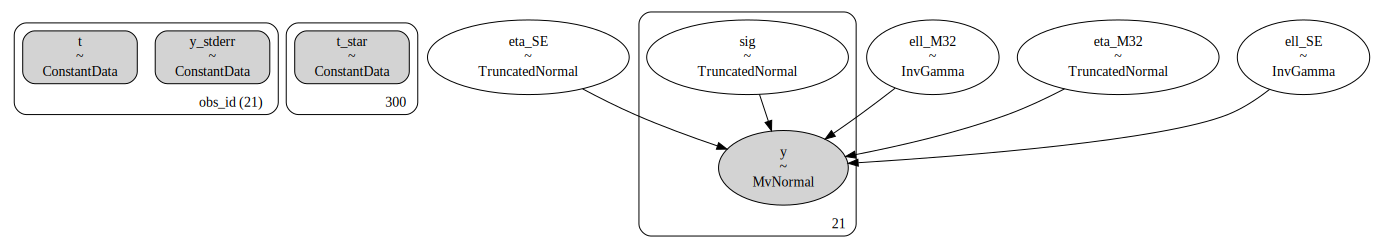

In [185]:
gpSE_gpM32_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpM32_idata.nc")
gpSE_gpM32_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpM32_dag.dot')

if gpSE_gpM32_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpM32_trace = az.from_netcdf(gpSE_gpM32_trace_path)
    gpSE_gpM32_dag = gv.Source.from_file(gpSE_gpM32_dag_path)
else:
    gpSE_gpM32_trace, gpSE_gpM32_dag = ufn.fit_gpSE_gpM32(csv_path, rng_seed=rng);
    az.to_netcdf(gpSE_gpM32_trace, gpSE_gpM32_trace_path)
    with open(gpSE_gpM32_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpM32_dag.source)

gv.Source(gpSE_gpM32_dag.source)

In [186]:
variable_names = ["ell_SE", "ell_M32", "eta_SE", "eta_M32"]
ufn.print_post_summary(gpSE_gpM32_trace, variable_names)

median        mad     eti_16%     eti_84%  mcse_median  \
ell_SE   228.473588  99.552532  120.671814  492.199721     3.709420   
ell_M32   10.131381   3.129422    6.638951   18.540965     0.108073   
eta_SE     0.081703   0.058697    0.024282    0.346498     0.002826   
eta_M32    0.000113   0.000059    0.000053    0.000404     0.000003   

          ess_median     ess_tail     r_hat        mean          sd  
ell_SE   3263.616631  1466.962928  1.001549  327.208097  370.773904  
ell_M32  2218.050086   468.031377  1.005143   14.598044   17.621296  
eta_SE   2910.448329  2851.392885  1.000477    0.192365    0.291304  
eta_M32  2487.803850   497.718752  1.002558    0.002152    0.021417

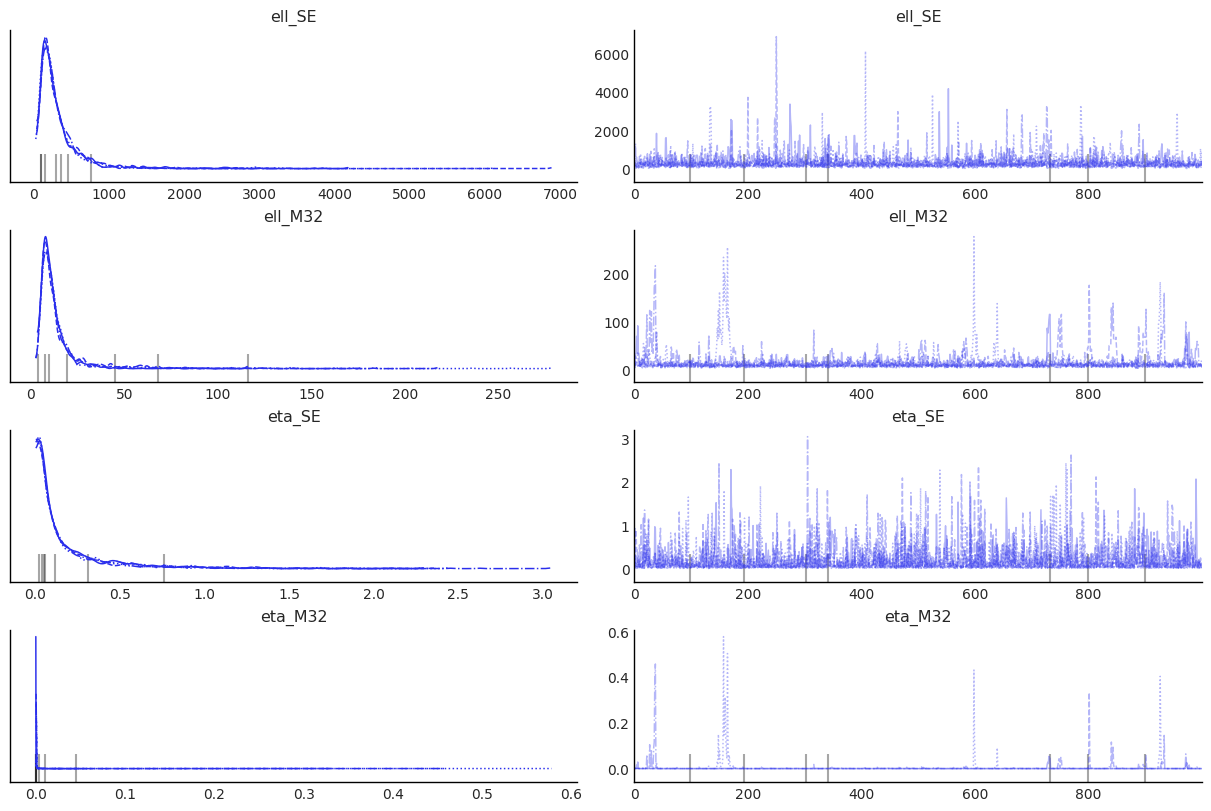

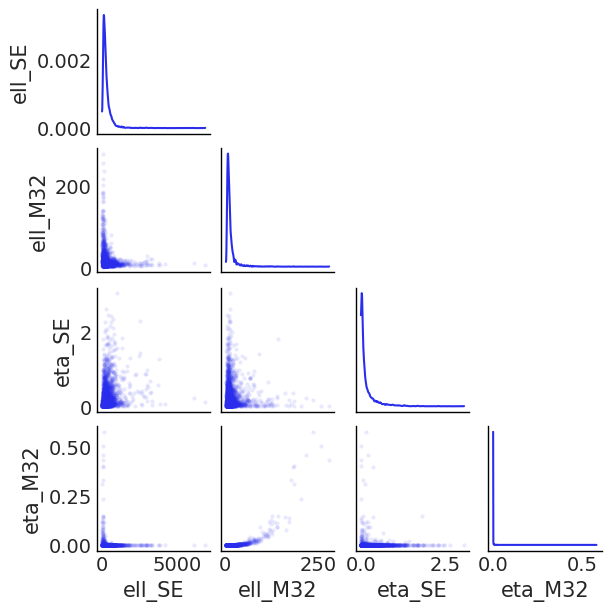

In [187]:
ufn.plot_traces(gpSE_gpM32_trace, variable_names)
ufn.plot_post_cnr(gpSE_gpM32_trace, variable_names)

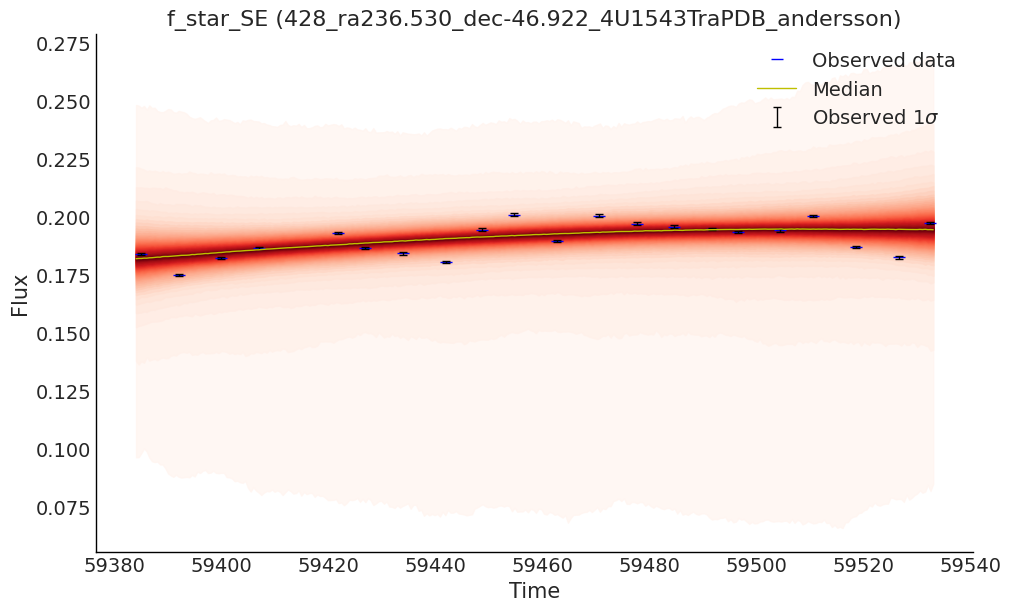

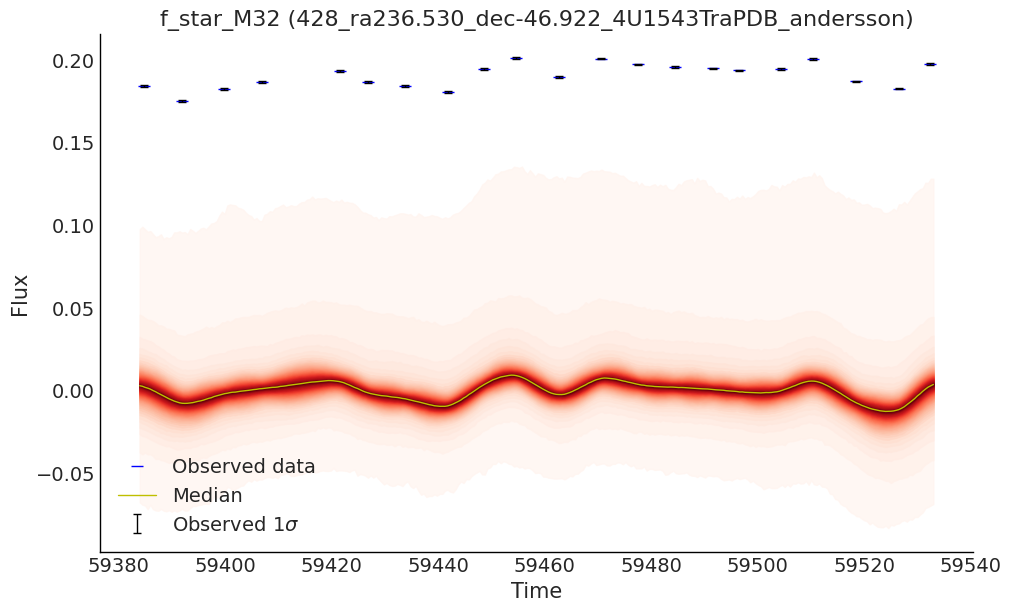

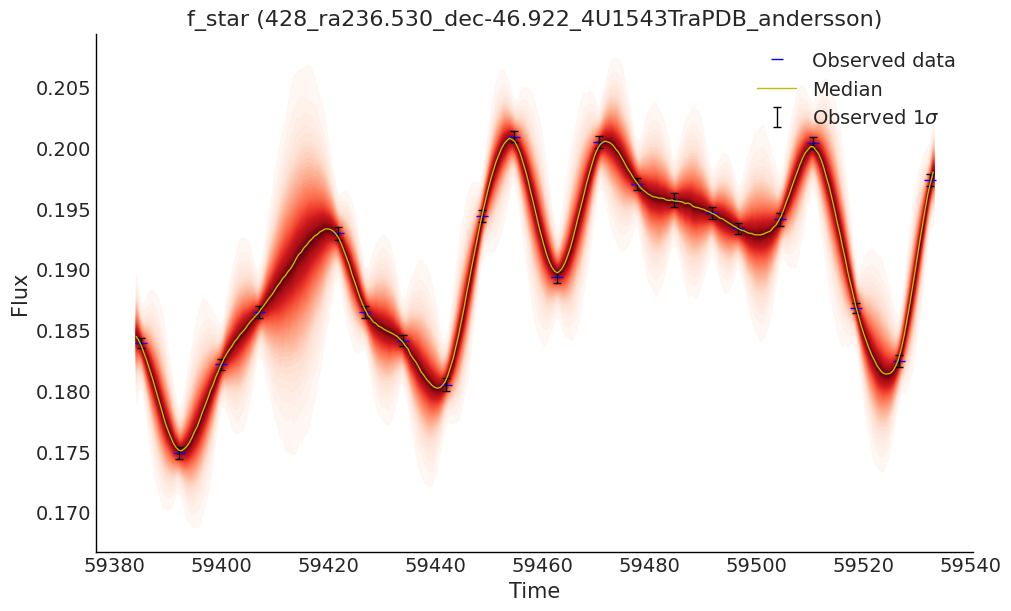

In [188]:
ufn.plot_postpred_samples(gpSE_gpM32_trace, "f_star_SE")
ufn.plot_postpred_samples(gpSE_gpM32_trace, "f_star_M32")
ufn.plot_postpred_samples(gpSE_gpM32_trace, "f_star")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


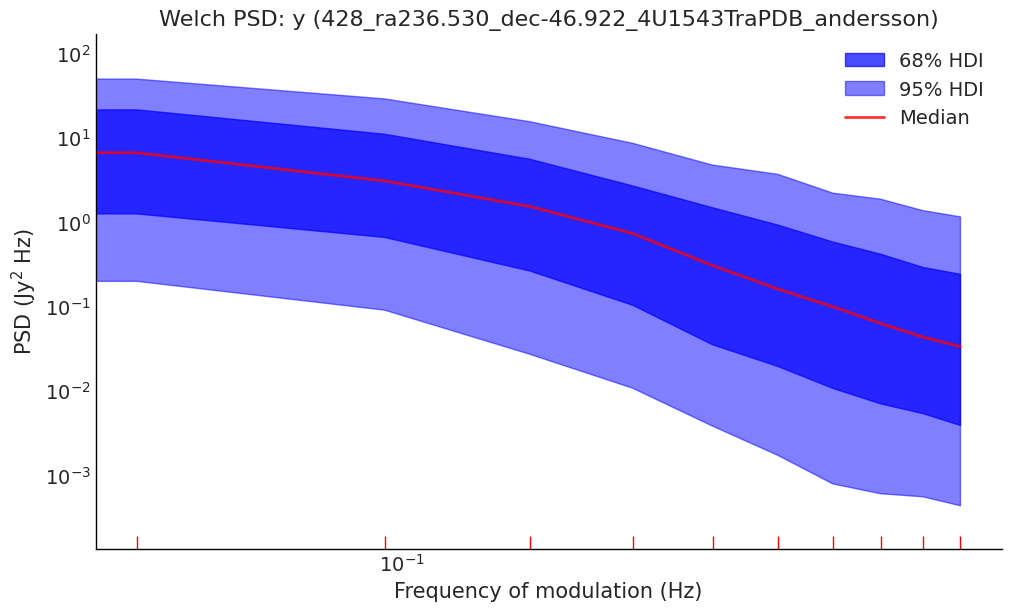

In [189]:
ufn.plot_welch_psd(gpSE_gpM32_trace, group="prior_predictive", variable_name="y")

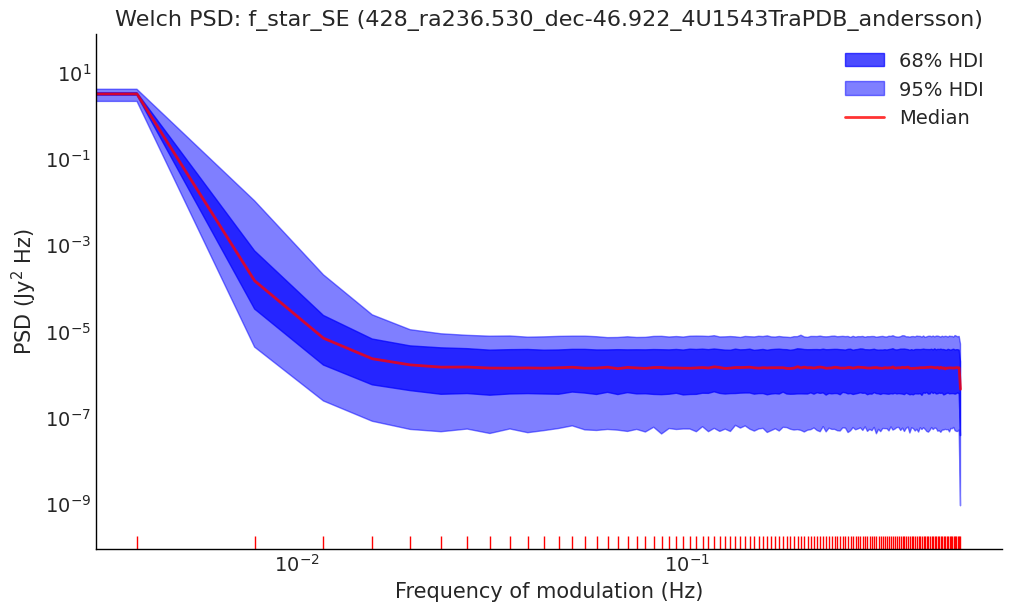

In [190]:
ufn.plot_welch_psd(gpSE_gpM32_trace, group="posterior_predictive", variable_name="f_star_SE");

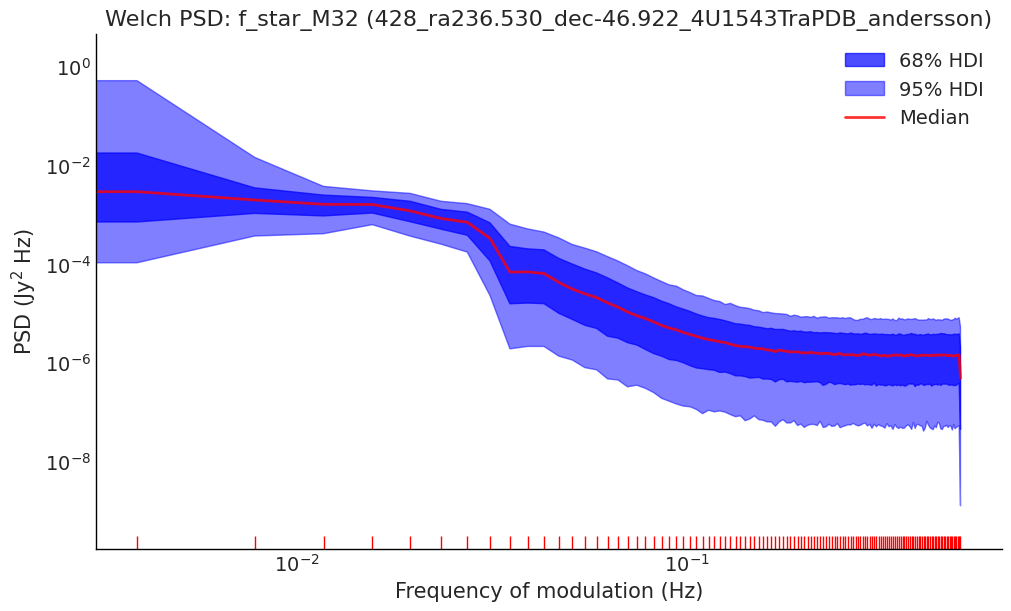

In [191]:
ufn.plot_welch_psd(gpSE_gpM32_trace, variable_name="f_star_M32");

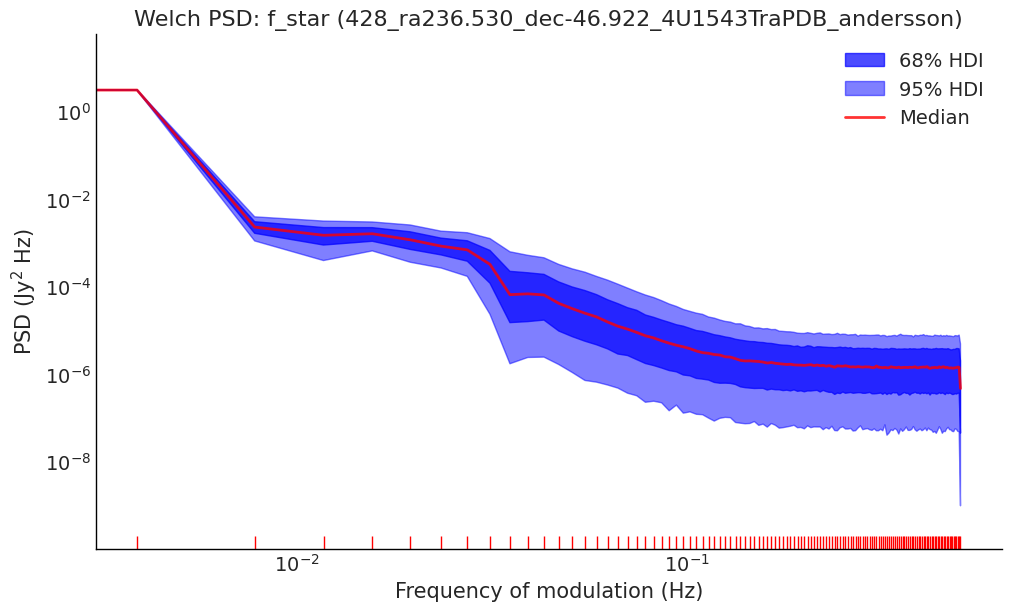

In [192]:
ufn.plot_welch_psd(gpSE_gpM32_trace, variable_name="f_star");

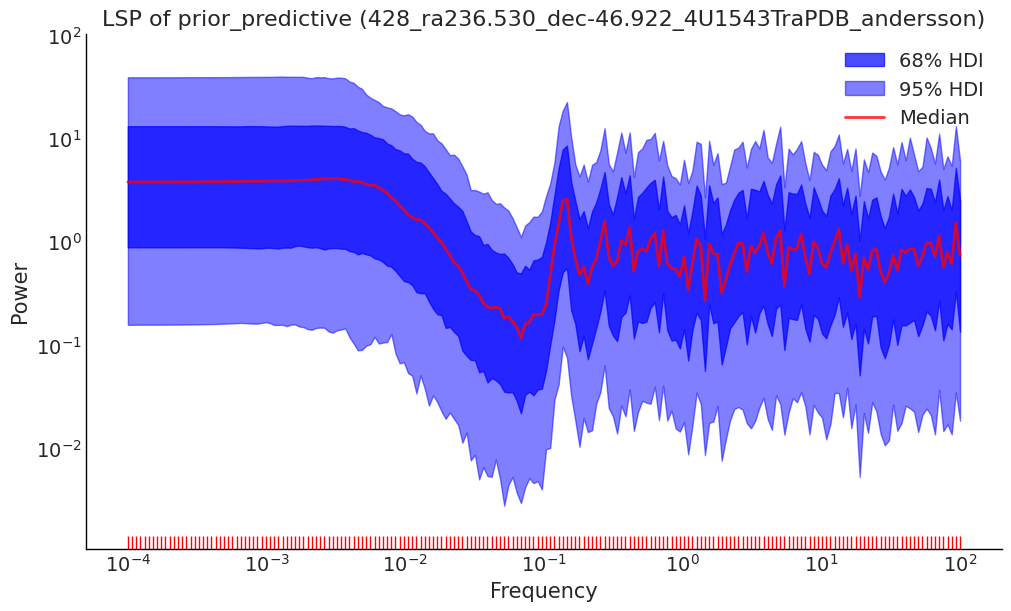

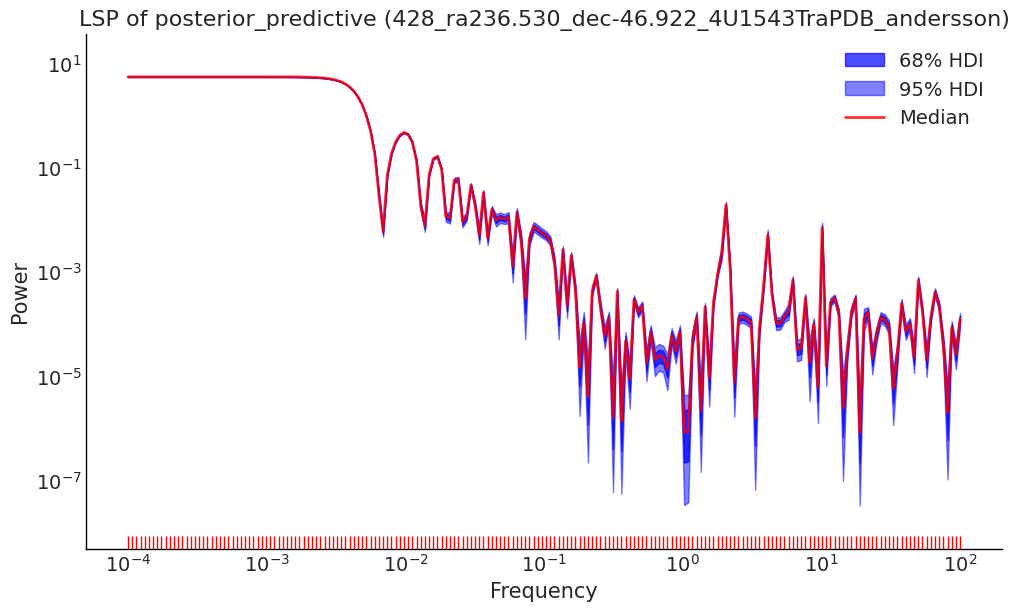

In [193]:
ufn.plot_lsp(gpSE_gpM32_trace, group="prior_predictive", variable_name="y")
ufn.plot_lsp(gpSE_gpM32_trace, group="posterior_predictive", variable_name="f_star")

/home/scf/git-repos/gp-sandbox-thunderkat/utility_functions.py:230: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog(freqs_nd, psd_median, lw=2, alpha=0.8, label=f"{var}")


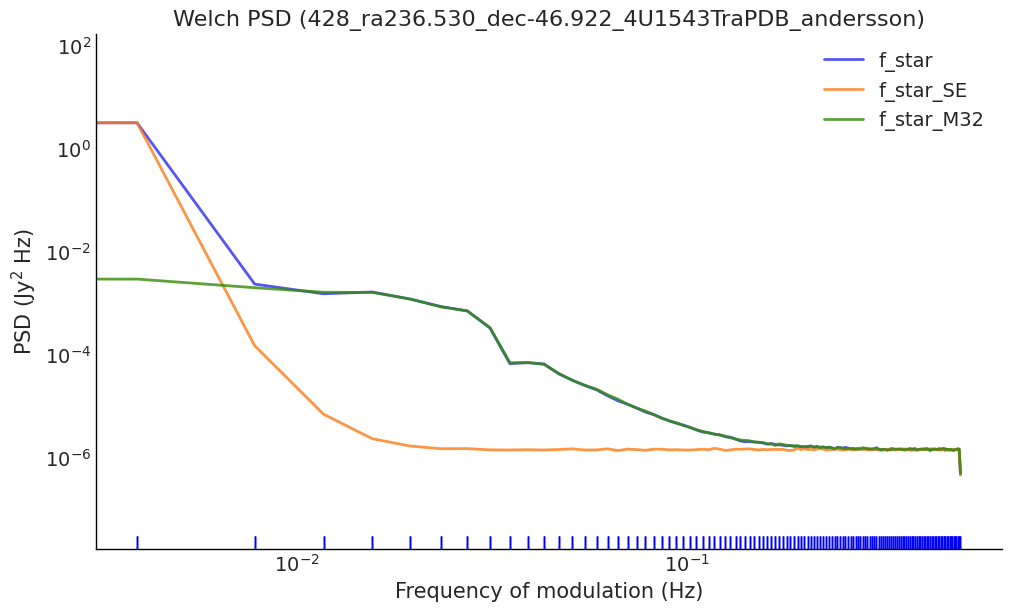

In [194]:
ufn.plot_welch_psds(gpSE_gpM32_trace)

## SE GP + Periodic GP

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{P}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}, \quad k_\textrm{P}(\tau) = \eta_\textrm{P} \exp \left\{ -\frac{1}{2\ell^2_\textrm{P}}\sin^2 \left(\pi\frac{\tau}{T}\right)\right\}$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{P} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta_\textrm{SE} \sim \mathcal{N}^+(0, 1)$$

$$\eta_\textrm{P} \sim \mathcal{N}^+(0, 1)$$

$$T \sim \mathcal{U}[\textrm{min gap t} \times 4, \textrm{range t}/4]$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

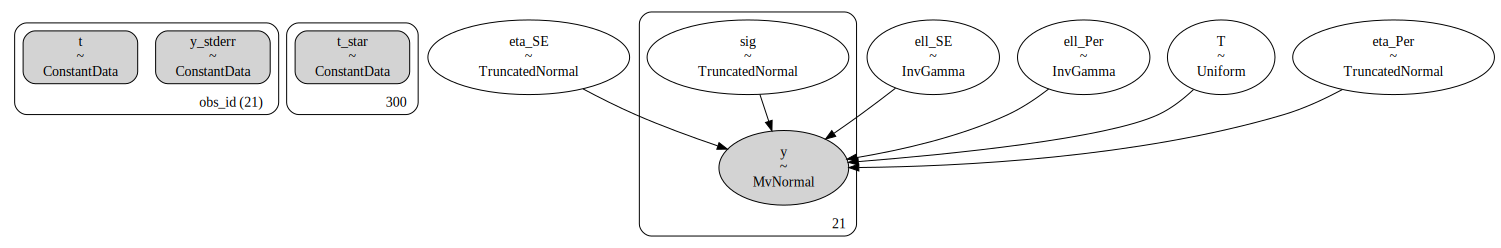

In [195]:
gpSE_gpPer_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpPer_idata.nc")
gpSE_gpPer_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpPer_dag.dot')

if gpSE_gpPer_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpPer_trace = az.from_netcdf(gpSE_gpPer_trace_path)
    gpSE_gpPer_dag = gv.Source.from_file(gpSE_gpPer_dag_path)
else:
    gpSE_gpPer_trace, gpSE_gpPer_dag = ufn.fit_gpSE_gpPer(csv_path, rng_seed=rng);
    az.to_netcdf(gpSE_gpPer_trace, gpSE_gpPer_trace_path)
    with open(gpSE_gpPer_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpPer_dag.source)

gv.Source(gpSE_gpPer_dag.source)

In [196]:
variable_names = ["ell_SE", "ell_Per", "eta_SE", "eta_Per", "T", "sig"]
ufn.print_post_summary(gpSE_gpPer_trace, variable_names)

median        mad    eti_16%    eti_84%   mcse_median  \
ell_SE    6.546544   0.647268   5.588208   7.512023  2.076398e-02   
ell_Per  27.897450  12.132183  14.807082  57.877140  4.715757e-01   
eta_SE    0.000083   0.000026   0.000054   0.000139  7.057440e-07   
eta_Per   0.123210   0.092674   0.031083   0.477850  4.742314e-03   
T        29.300357   3.332290  22.630390  33.589510  1.715339e-01   
sig[0]    0.000420   0.000017   0.000400   0.000450  6.198711e-07   
sig[1]    0.000520   0.000016   0.000500   0.000550  6.626453e-07   
sig[2]    0.000491   0.000016   0.000472   0.000521  6.010264e-07   
sig[3]    0.000545   0.000016   0.000526   0.000575  6.629040e-07   
sig[4]    0.000584   0.000016   0.000564   0.000612  5.295270e-07   
sig[5]    0.000495   0.000016   0.000476   0.000524  7.007667e-07   
sig[6]    0.000489   0.000016   0.000471   0.000519  6.954332e-07   
sig[7]    0.000564   0.000016   0.000545   0.000593  5.615115e-07   
sig[8]    0.000520   0.000016   0.000500   0.000548  5.560972e-07   
sig[9]    0.000503   0.000016   0.000485   0.000533  5.720739e-07   
sig[10]   0.000516   0.000017   0.000496   0.000545  6.391518e-07   
sig[11]   0.000500   0.000016   0.000481   0.000529  6.007844e-07   
sig[12]   0.000519   0.000016   0.000501   0.000551  6.212118e-07   
sig[13]   0.000618   0.000016   0.000599   0.000648  7.225586e-07   
sig[14]   0.000495   0.000016   0.000476   0.000525  6.508769e-07   
sig[15]   0.000494   0.000016   0.000474   0.000521  5.118061e-07   
sig[16]   0.000544   0.000016   0.000525   0.000572  6.174962e-07   
sig[17]   0.000523   0.000017   0.000503   0.000553  7.297339e-07   
sig[18]   0.000466   0.000016   0.000446   0.000494  8.058928e-07   
sig[19]   0.000533   0.000016   0.000514   0.000564  7.385730e-07   
sig[20]   0.000538   0.000016   0.000519   0.000568  5.924962e-07   

          ess_median     ess_tail     r_hat       mean         sd  
ell_SE   3049.730267  2065.120088  1.001890   6.540585   0.971822  
ell_Per  3901.125464  2630.022850  1.000723  37.650484  33.665972  
eta_SE   3456.919674  2970.656179  1.001036   0.000099   0.000062  
eta_Per  3203.553786  3499.196952  1.000810   0.251539   0.336159  
T        2478.307446  1968.161595  1.000420  28.742108   4.614389  
sig[0]   2510.604935  1240.748912  1.001436   0.000425   0.000026  
sig[1]   2875.015775  1713.170021  0.999703   0.000525   0.000025  
sig[2]   3058.879468  1338.523482  1.001111   0.000496   0.000024  
sig[3]   2972.714995  1639.782559  1.000884   0.000550   0.000024  
sig[4]   2804.821908  1612.298899  1.001355   0.000588   0.000023  
sig[5]   2557.798274  1422.849635  1.002346   0.000500   0.000024  
sig[6]   2598.273785  1697.154275  1.001937   0.000495   0.000025  
sig[7]   2713.623463  1275.780525  1.000302   0.000569   0.000024  
sig[8]   2681.501273  1485.618011  1.000492   0.000524   0.000024  
sig[9]   2709.486134  2146.848480  1.001173   0.000508   0.000024  
sig[10]  3050.321881  1545.846363  1.002012   0.000521   0.000025  
sig[11]  2615.847464  1779.073864  1.000539   0.000505   0.000024  
sig[12]  2946.585277  1147.278384  1.001095   0.000525   0.000025  
sig[13]  3086.868325  1294.918978  0.999981   0.000623   0.000024  
sig[14]  2639.179467  1627.910115  1.001266   0.000500   0.000025  
sig[15]  3170.458007  1617.653057  1.000775   0.000498   0.000024  
sig[16]  2839.545613  1778.258024  1.000076   0.000549   0.000024  
sig[17]  2375.343904   631.533003  1.004173   0.000528   0.000025  
sig[18]  2460.601957  1981.695150  1.000810   0.000470   0.000024  
sig[19]  2639.460547  1149.299426  1.001198   0.000538   0.000025  
sig[20]  2574.054035  1752.416937  1.000683   0.000542   0.000024

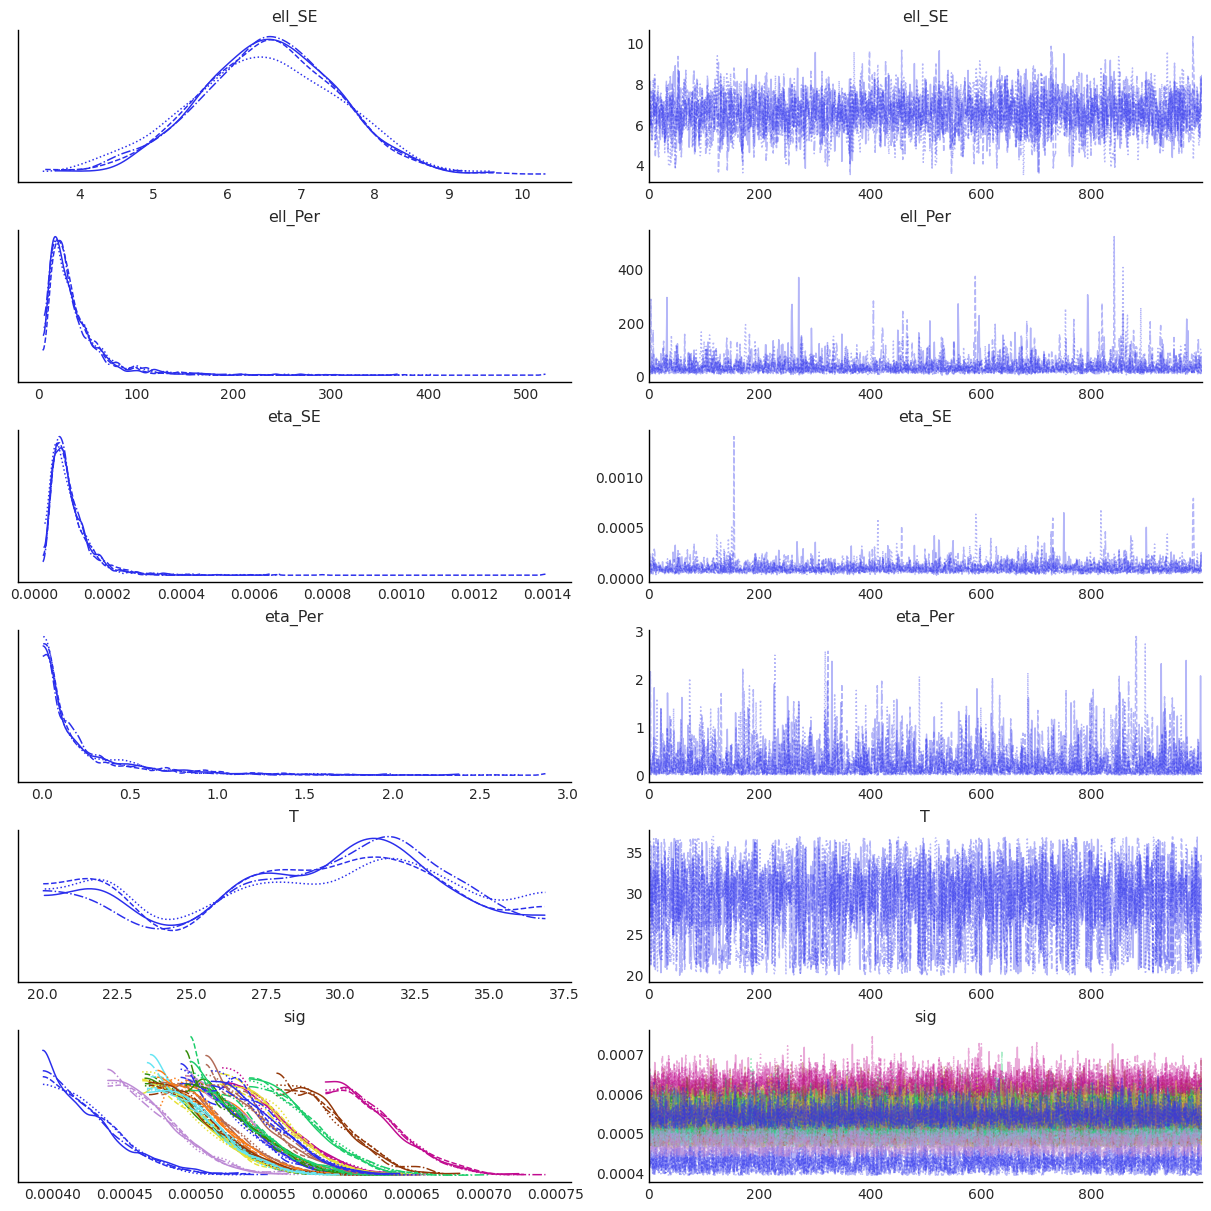

In [197]:
ufn.plot_traces(gpSE_gpPer_trace, variable_names);

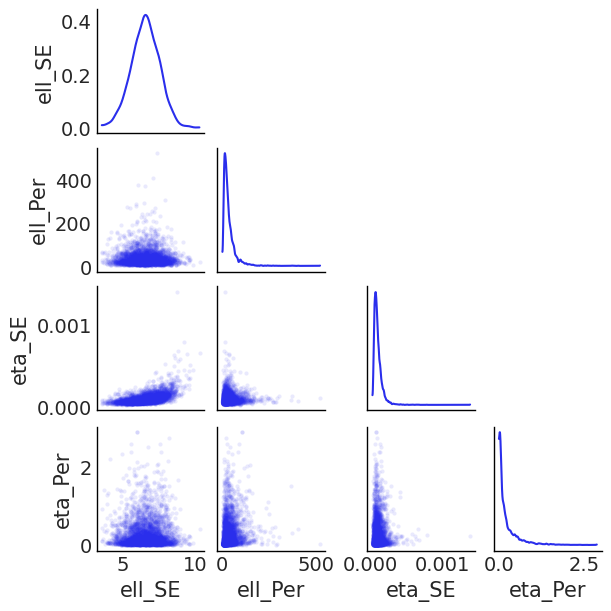

In [198]:
ufn.plot_post_cnr(gpSE_gpPer_trace, variable_names=['ell_SE', 'ell_Per', 'eta_SE', 'eta_Per'])

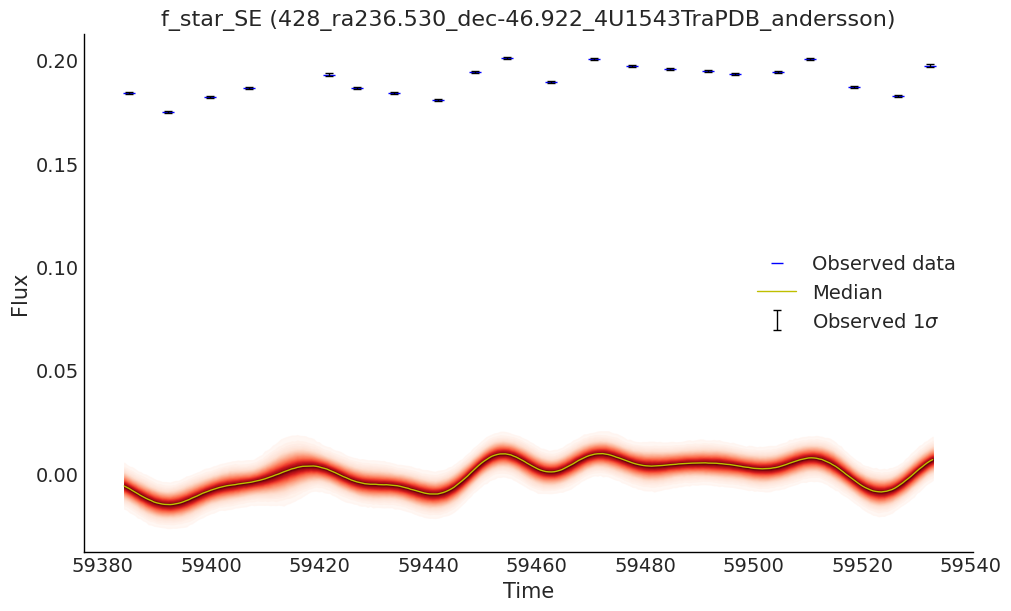

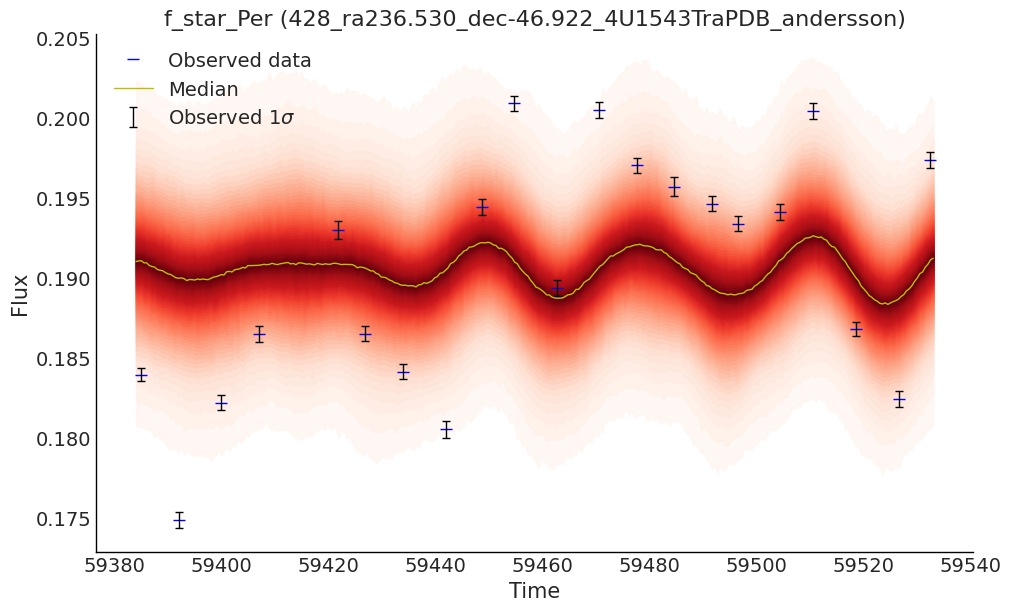

In [199]:
ufn.plot_postpred_samples(gpSE_gpPer_trace, "f_star_SE")
ufn.plot_postpred_samples(gpSE_gpPer_trace, "f_star_Per")

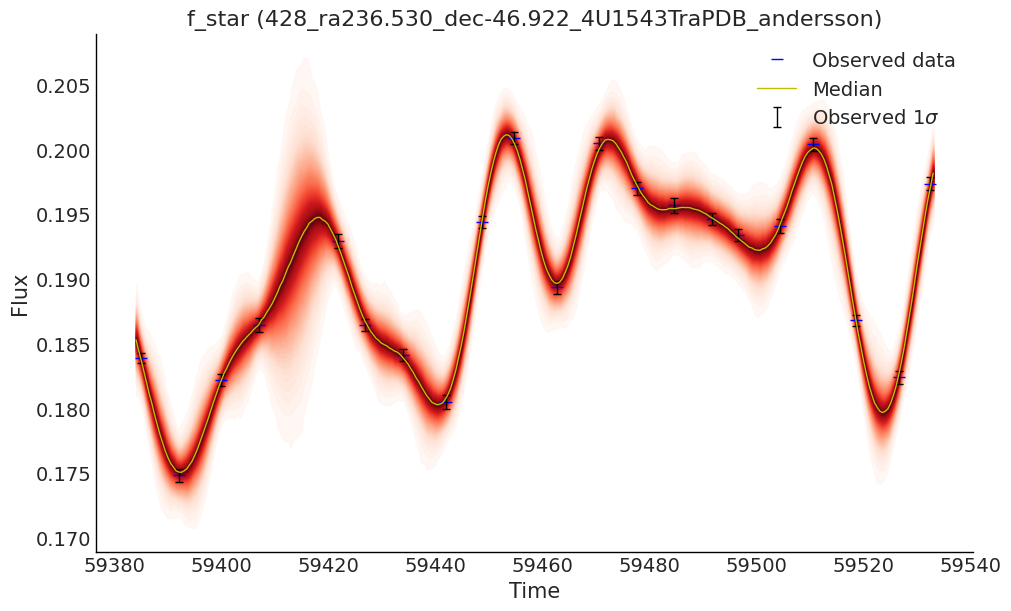

In [200]:
ufn.plot_postpred_samples(gpSE_gpPer_trace, "f_star")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


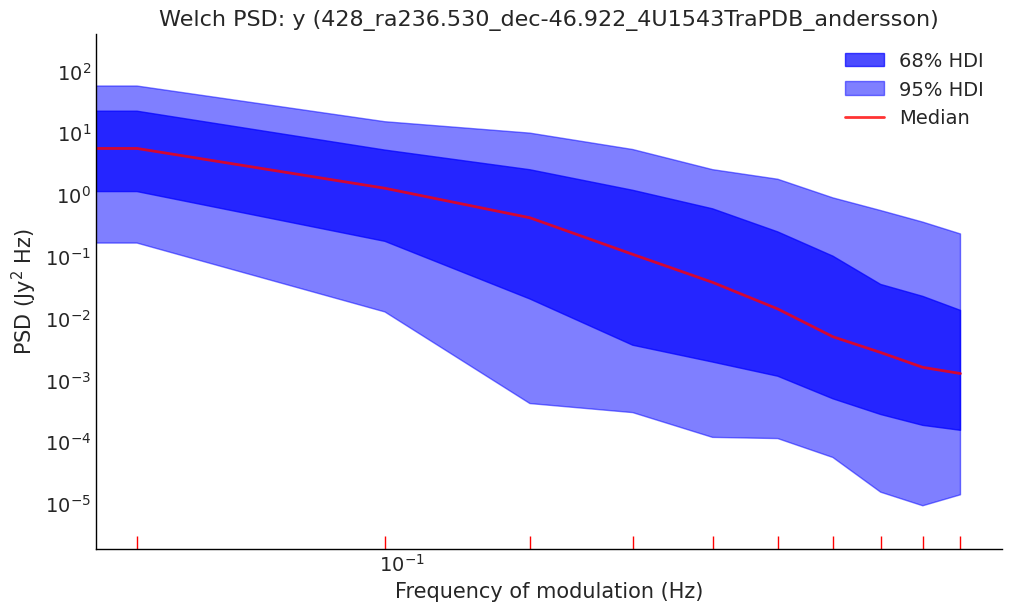

In [201]:
ufn.plot_welch_psd(gpSE_gpPer_trace, group="prior_predictive", variable_name="y")

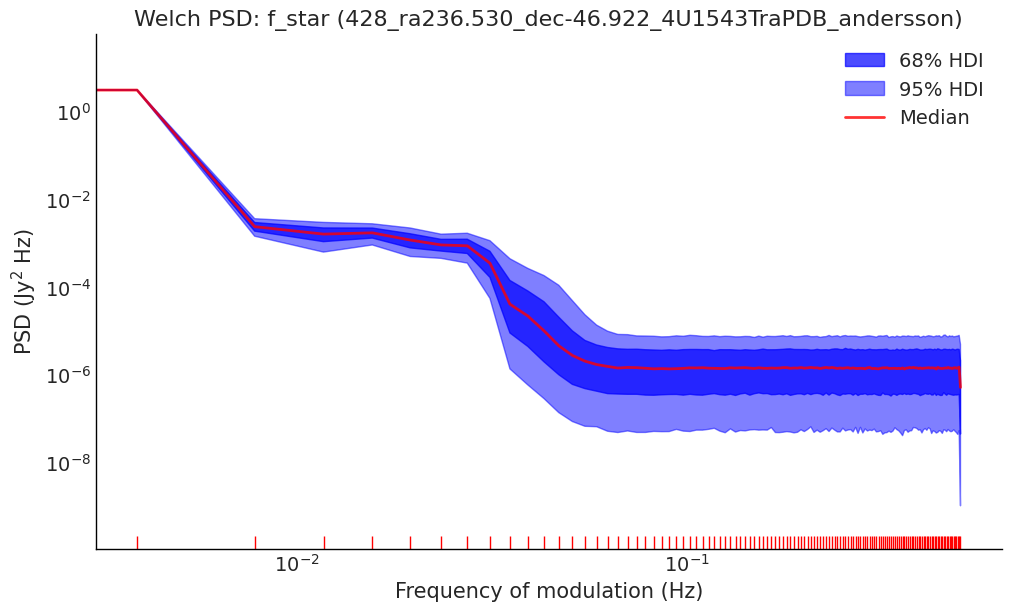

In [202]:
ufn.plot_welch_psd(gpSE_gpPer_trace, group="posterior_predictive", variable_name="f_star");

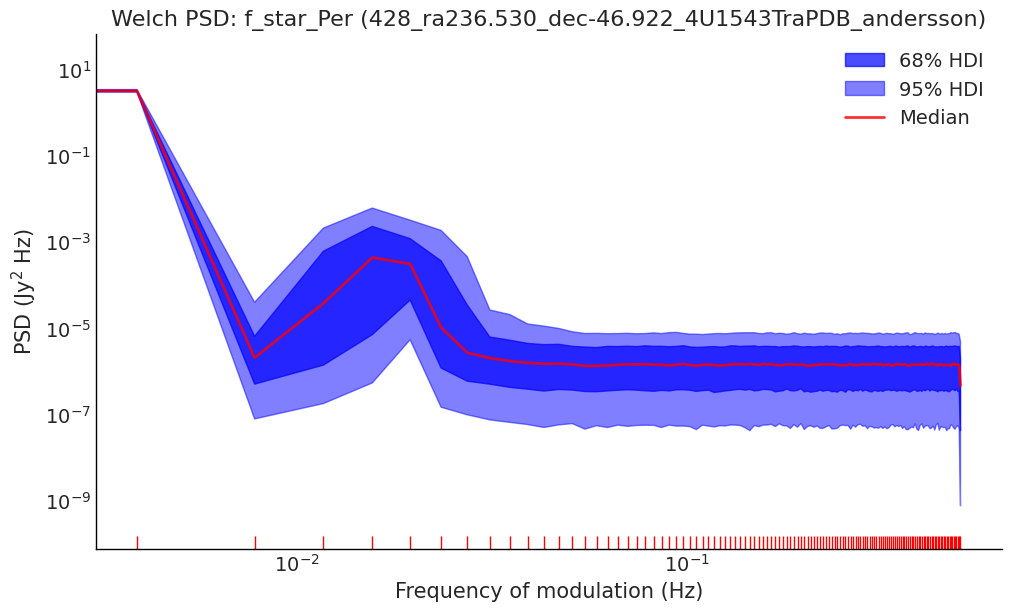

In [203]:
ufn.plot_welch_psd(gpSE_gpPer_trace, group="posterior_predictive", variable_name="f_star_Per");

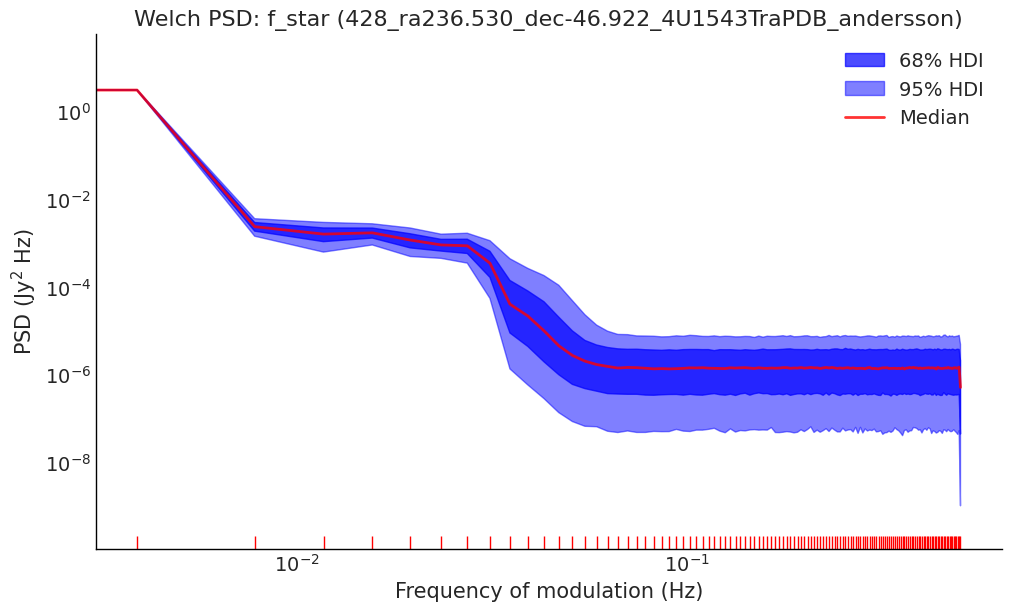

In [204]:
ufn.plot_welch_psd(gpSE_gpPer_trace, group="posterior_predictive", variable_name="f_star");

/home/scf/git-repos/gp-sandbox-thunderkat/utility_functions.py:230: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog(freqs_nd, psd_median, lw=2, alpha=0.8, label=f"{var}")


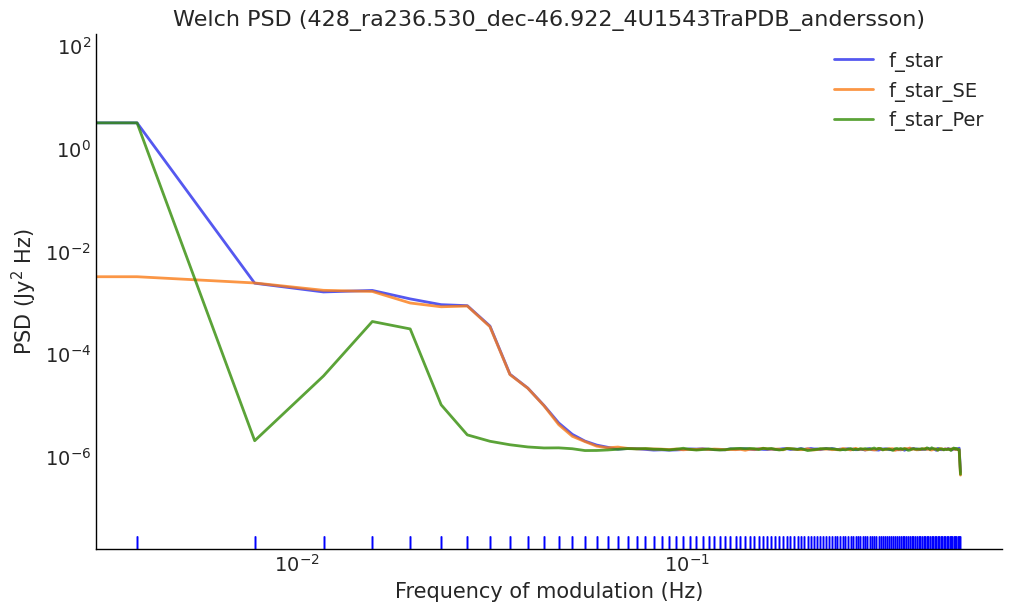

In [205]:
ufn.plot_welch_psds(gpSE_gpPer_trace, variable_names=["f_star", "f_star_SE", "f_star_Per"])

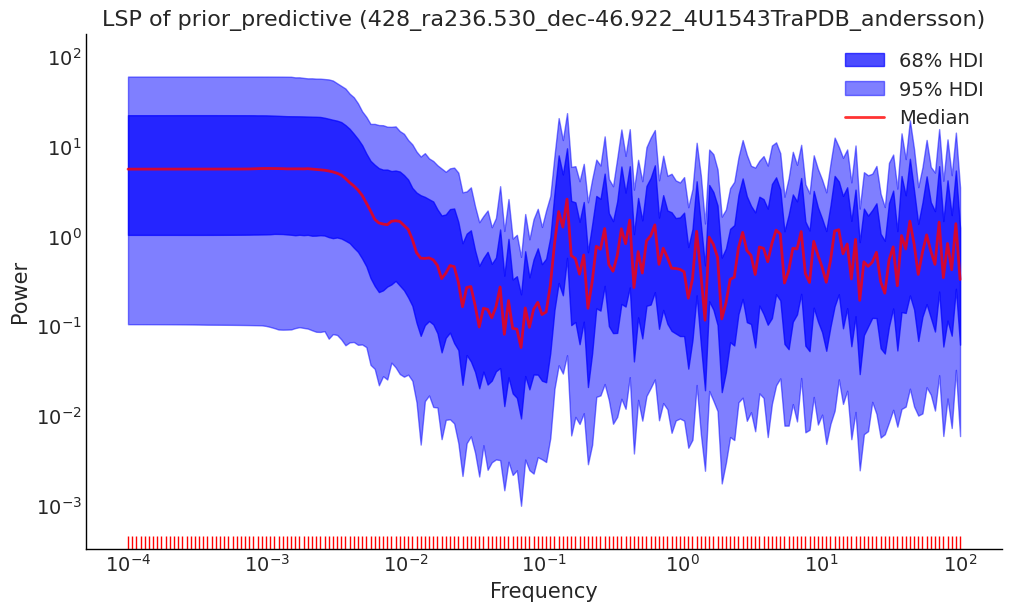

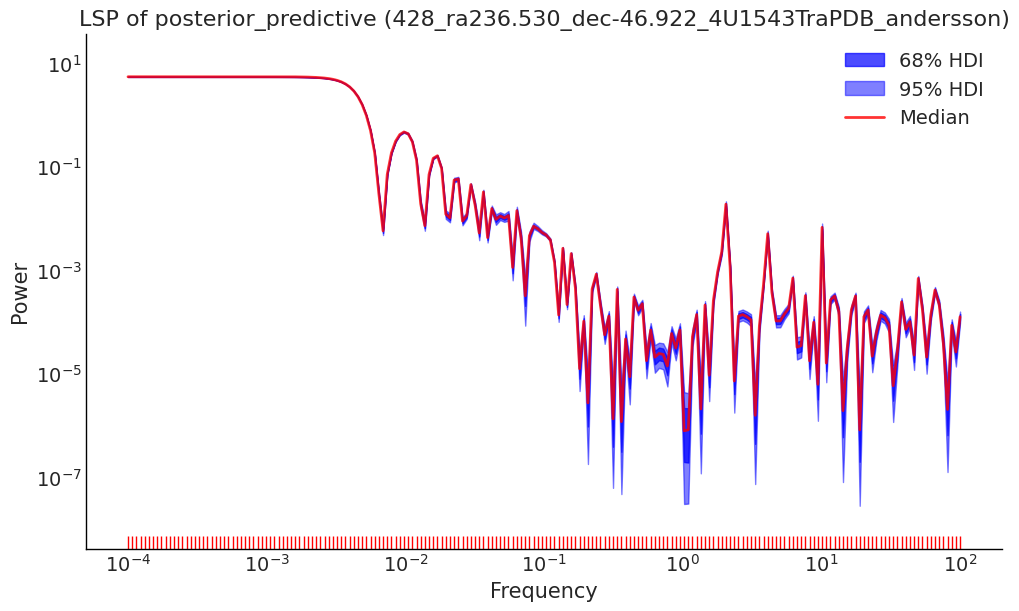

In [206]:
ufn.plot_lsp(gpSE_gpPer_trace, "prior_predictive", "y")
ufn.plot_lsp(gpSE_gpPer_trace)